In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
path = 'results/California_Housing/random_search_results_all_4bits.csv'
path = r'C:\Users\k_schr40\Downloads\BNG(wisconsin)_hyperparameter_tuning_4bits_100steps.csv'
df = pd.read_csv(path)

In [11]:
df

,weight_decay,learning_rate,hidden_layers,hidden_neurons,num_epochs,decrease_factor,val_loss_mlp,val_loss_hard_post_mlp,val_loss_hard_thr_post_mlp,val_loss_hard_pre_mlp,val_loss_hard_thr_pre_mlp,val_loss_soft_mlp,val_loss_soft_hard_mlp,val_loss_soft_comp_mlp,val_loss_soft_hard_comp_mlp
0,0.0000,0.0010,3,128,30,0.0001,650.704857,711.828912,662.238912,698.277910,735.843668,681.915584,681.958749,581.712904,581.775301
1,0.0001,0.0010,4,128,30,0.0010,653.727567,707.813206,664.908221,694.679515,740.855721,674.525010,675.088195,553.021965,553.424341
2,0.0000,0.0010,3,128,50,0.0010,655.762440,711.167330,664.717177,707.668172,746.735655,649.011938,649.585248,558.422408,558.785635
3,0.0000,0.0010,6,128,50,0.0010,662.349335,720.762360,674.220334,713.778472,730.940402,640.646680,641.214148,578.202523,578.607962
4,0.0000,0.0010,5,256,30,0.0010,668.579333,719.987899,678.881014,716.750894,739.698603,649.596996,650.039679,563.300873,563.657645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0001,0.0001,4,512,70,0.0010,1021.788723,1083.256685,1019.102495,1071.203262,1051.760069,808.978336,809.551331,690.280420,690.870457
96,0.0000,0.0001,3,2048,70,0.0001,1022.322750,1100.675725,1018.001336,1094.322851,1026.122274,913.066898,913.105130,710.688820,710.767078
97,0.0000,0.0001,4,1024,70,0.0001,1027.223627,1090.007150,1029.500139,1119.608639,1060.231729,930.482718,930.505597,766.597823,766.709585
98,0.0000,0.0001,6,512,50,0.0010,1027.563585,1074.658583,1026.427697,1097.946790,1078.907677,919.373782,919.823716,735.538804,735.991584


In [159]:
df.columns

Index(['weight_decay', 'learning_rate', 'hidden_layers', 'hidden_neurons',
       'num_epochs', 'decrease_factor', 'val_loss_mlp',
       'val_loss_hard_post_mlp', 'val_loss_hard_thr_post_mlp',
       'val_loss_hard_pre_mlp', 'val_loss_hard_thr_pre_mlp',
       'val_loss_soft_mlp', 'val_loss_soft_hard_mlp', 'val_loss_soft_comp_mlp',
       'val_loss_soft_hard_comp_mlp'],
      dtype='object')

In [12]:
loss_columns = [col for col in df.columns if 'loss' in col]

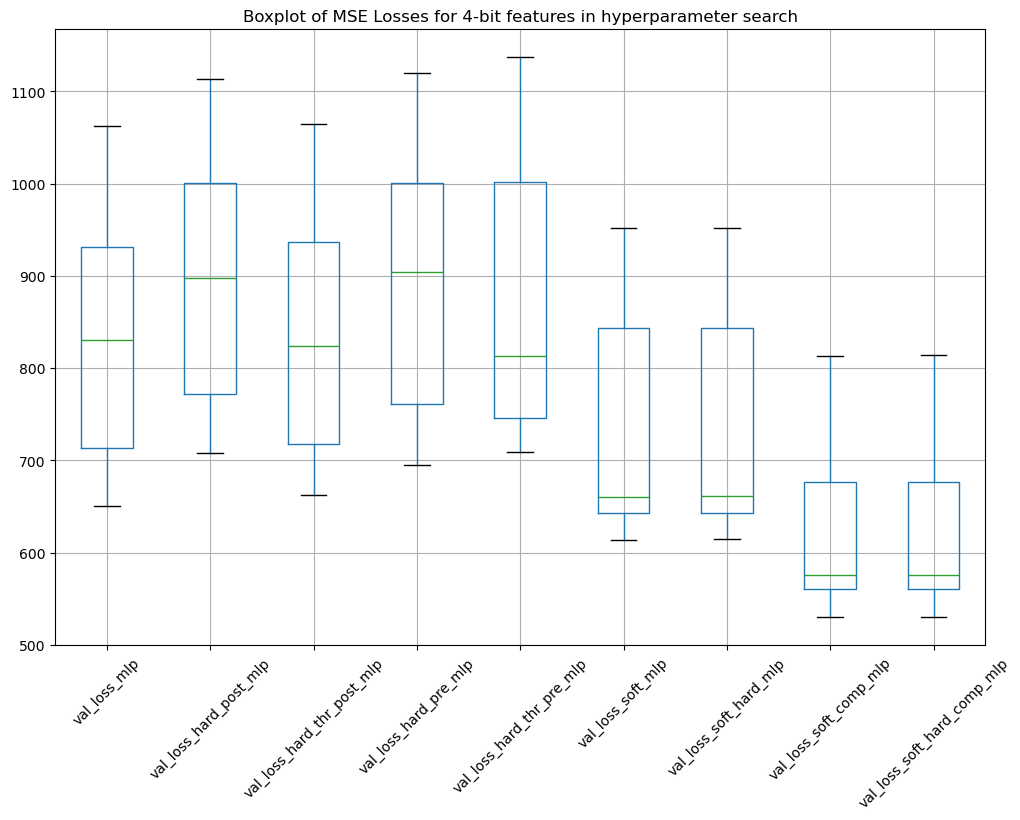

In [13]:
df[loss_columns].boxplot(figsize=(12, 8))
plt.xticks(rotation=45)
# plt.ylim(0.45,0.8)
plt.title('Boxplot of MSE Losses for 4-bit features in hyperparameter search')
plt.show()

In [74]:
df[loss_columns].values.argmin(axis=0)

array([ 0, 15,  2,  3, 25, 77, 77,  3,  3], dtype=int64)

In [15]:
df.iloc[df[loss_columns].values.argmin(axis=0)]

,weight_decay,learning_rate,hidden_layers,hidden_neurons,num_epochs,decrease_factor,val_loss_mlp,val_loss_hard_post_mlp,val_loss_hard_thr_post_mlp,val_loss_hard_pre_mlp,val_loss_hard_thr_pre_mlp,val_loss_soft_mlp,val_loss_soft_hard_mlp,val_loss_soft_comp_mlp,val_loss_soft_hard_comp_mlp
0,0.0000,0.0010,3,128,30,0.0001,650.704857,711.828912,662.238912,698.277910,735.843668,681.915584,681.958749,581.712904,581.775301
1,0.0001,0.0010,4,128,30,0.0010,653.727567,707.813206,664.908221,694.679515,740.855721,674.525010,675.088195,553.021965,553.424341
0,0.0000,0.0010,3,128,30,0.0001,650.704857,711.828912,662.238912,698.277910,735.843668,681.915584,681.958749,581.712904,581.775301
1,0.0001,0.0010,4,128,30,0.0010,653.727567,707.813206,664.908221,694.679515,740.855721,674.525010,675.088195,553.021965,553.424341
6,0.0000,0.0001,4,128,70,0.0010,672.858152,726.495182,680.600200,708.664803,708.668314,614.179634,614.479964,551.072312,551.500426
6,0.0000,0.0001,4,128,70,0.0010,672.858152,726.495182,680.600200,708.664803,708.668314,614.179634,614.479964,551.072312,551.500426
6,0.0000,0.0001,4,128,70,0.0010,672.858152,726.495182,680.600200,708.664803,708.668314,614.179634,614.479964,551.072312,551.500426
15,0.0001,0.0001,3,256,70,0.0010,690.291178,742.651103,694.809269,735.586818,731.363483,618.437874,618.867296,529.728763,530.278582
15,0.0001,0.0001,3,256,70,0.0010,690.291178,742.651103,694.809269,735.586818,731.363483,618.437874,618.867296,529.728763,530.278582


In [14]:
df[loss_columns].min()

val_loss_mlp                   650.704857
val_loss_hard_post_mlp         707.813206
val_loss_hard_thr_post_mlp     662.238912
val_loss_hard_pre_mlp          694.679515
val_loss_hard_thr_pre_mlp      708.668314
val_loss_soft_mlp              614.179634
val_loss_soft_hard_mlp         614.479964
val_loss_soft_comp_mlp         529.728763
val_loss_soft_hard_comp_mlp    530.278582
dtype: float64

In [42]:
mean_values = df.groupby(['hidden_layers', 'hidden_neurons'],as_index=False).min()




In [43]:
mean_values

,hidden_layers,hidden_neurons,weight_decay,learning_rate,num_epochs,decrease_factor,val_loss_mlp,val_loss_hard_post_mlp,val_loss_hard_thr_post_mlp,val_loss_hard_pre_mlp,val_loss_hard_thr_pre_mlp,val_loss_soft_mlp,val_loss_soft_hard_mlp,val_loss_soft_comp_mlp,val_loss_soft_hard_comp_mlp
0,3,128,0.0000,0.0001,30,0.0001,0.511496,0.531291,0.531379,0.517883,0.548897,0.516204,0.516217,0.492935,0.492939
1,3,256,0.0000,0.0001,30,0.0001,0.515738,0.527726,0.513264,0.518606,0.563912,0.596913,0.596913,0.526010,0.526095
2,3,512,0.0000,0.0001,30,0.0001,0.495310,0.527021,0.506461,0.513800,0.588676,0.543124,0.543134,0.485902,0.485653
3,3,1024,0.0000,0.0001,30,0.0001,0.493237,0.528941,0.511334,0.494213,0.561089,0.543581,0.543646,0.488849,0.493246
4,3,2048,0.0000,0.0001,30,0.0001,0.484188,0.525667,0.499436,0.531117,0.541773,0.535432,0.535432,0.502196,0.502213
5,3,4096,0.0000,0.0001,30,0.0001,0.494978,0.552824,0.512585,0.505192,0.563352,0.551819,0.553830,0.488568,0.492040
6,4,128,0.0000,0.0010,70,0.0001,0.513863,0.591685,0.535613,0.516981,0.562615,0.517517,0.517517,0.539679,0.539681
7,4,256,0.0000,0.0001,30,0.0001,0.496344,0.517589,0.502730,0.506099,0.562476,0.548482,0.549089,0.489658,0.489655
8,4,512,0.0000,0.0001,50,0.0001,0.510100,0.576252,0.528072,0.536181,0.573663,0.542423,0.542550,0.538111,0.539328
9,4,1024,0.0000,0.0001,30,0.0001,0.530220,0.572132,0.536425,0.518371,0.574968,0.546671,0.546681,0.498941,0.498941


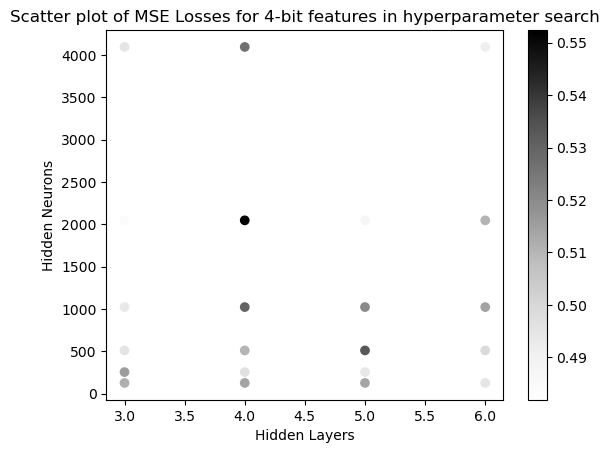

In [45]:
plt.scatter(mean_values['hidden_layers'], mean_values['hidden_neurons'], c = mean_values['val_loss_mlp'], cmap='Greys')
plt.colorbar()
plt.xlabel('Hidden Layers')
plt.ylabel('Hidden Neurons')
plt.title('Scatter plot of MSE Losses for 4-bit features in hyperparameter search')
plt.show()

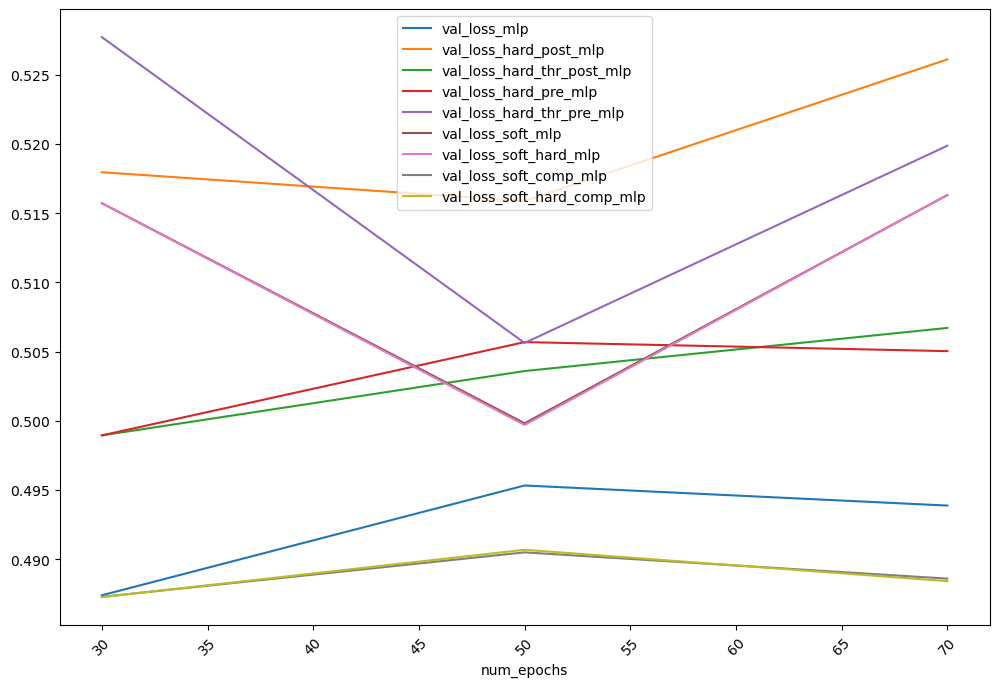

In [32]:
hyperparameter = 'num_epochs'
temp = df.groupby(hyperparameter).quantile(0.03) 
temp[loss_columns].plot(figsize=(12, 8))
plt.xticks(rotation=45)
plt.show()

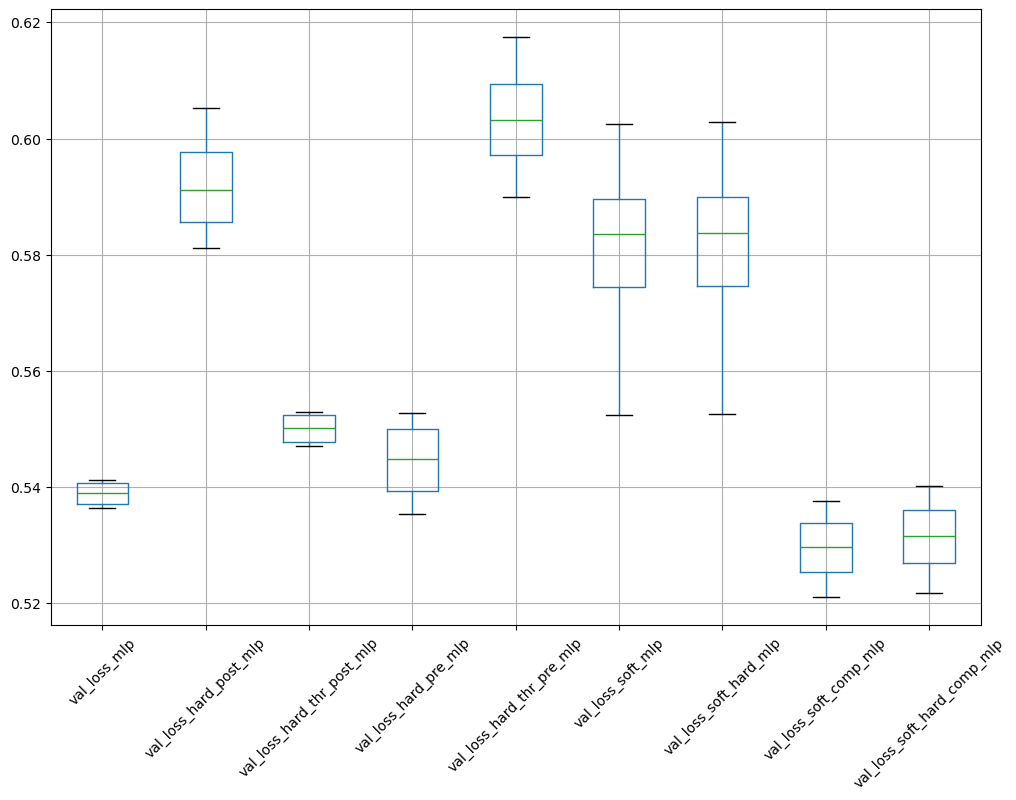

In [16]:
df.groupby('hidden_layers').mean().boxplot(column=loss_columns, figsize=(12, 8))
plt.xticks(rotation=45)
plt.show()

In [8]:
path = 'results/California_Housing/random_search_results_all_best_val_losses.csv'
df_8bit = pd.read_csv(path)

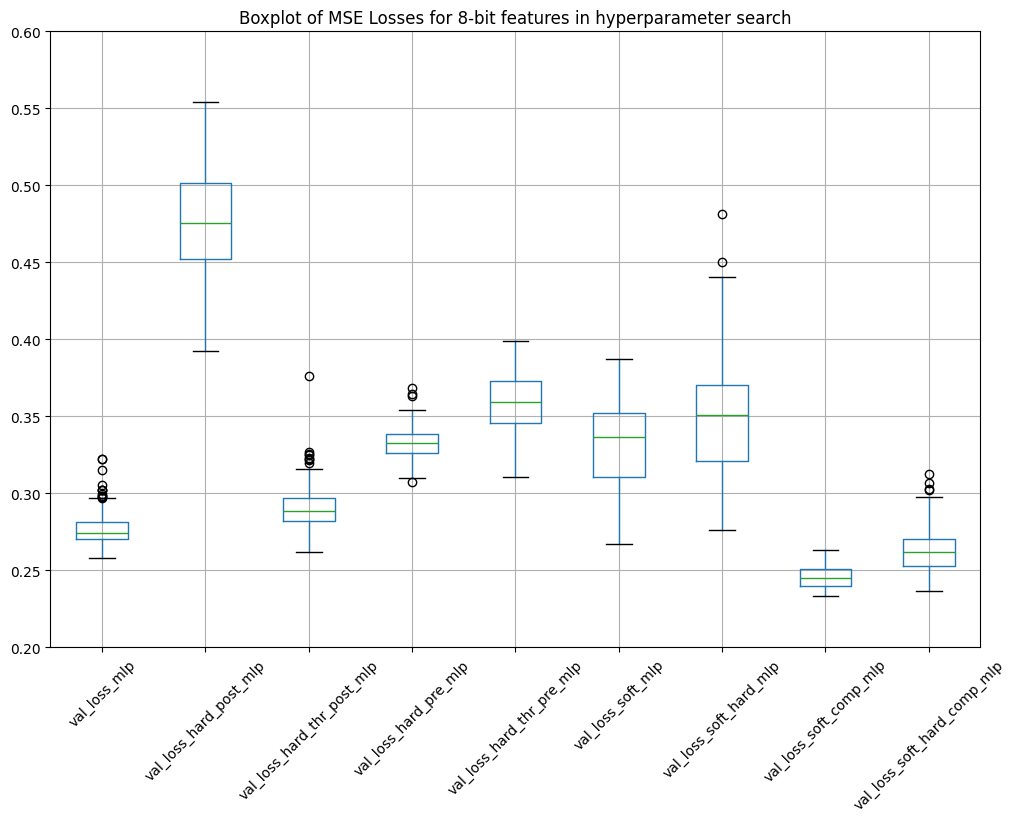

In [9]:
df_8bit[loss_columns].boxplot(figsize=(12, 8))
plt.xticks(rotation=45)
plt.ylim(0.2,0.6)
plt.title('Boxplot of MSE Losses for 8-bit features in hyperparameter search')
plt.show()

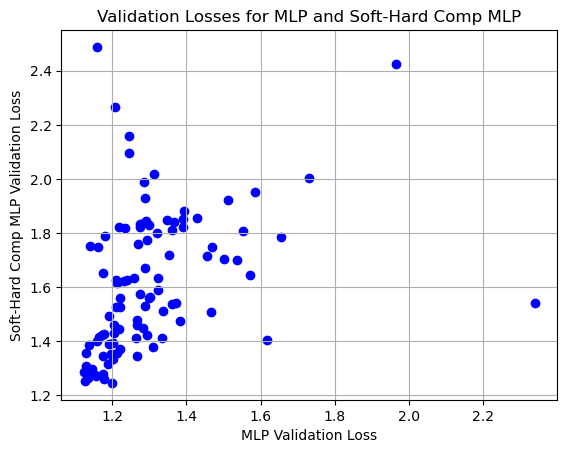

In [64]:
plt.scatter(df['val_loss_mlp'],df['val_loss_soft_hard_comp_mlp'], color = 'blue')
plt.title('Validation Losses for MLP and Soft-Hard Comp MLP')
plt.xlabel('MLP Validation Loss')
plt.ylabel('Soft-Hard Comp MLP Validation Loss')
# plt.plot([0.25, 0.45], [0.25, 0.45], 'r--')
# plt.xlim(0.25, 0.45)
# plt.ylim(0.25, 0.45)
# plt.xticks(np.arange(0.25, 0.46, 0.02))
# plt.yticks(np.arange(0.25, 0.46, 0.02))
plt.grid()
plt.show()

In [11]:
df.sort_values(by='val_loss_soft_hard_comp_mlp', ascending=True, inplace=True)
df.head()

,weight_decay,learning_rate,hidden_layers,hidden_neurons,num_epochs,decrease_factor,val_loss_mlp,val_loss_hard_post_mlp,val_loss_hard_thr_post_mlp,val_loss_hard_pre_mlp,val_loss_hard_thr_pre_mlp,val_loss_soft_mlp,val_loss_soft_hard_mlp,val_loss_soft_comp_mlp,val_loss_soft_hard_comp_mlp
80,0.0001,0.0001,3,512,30,0.0001,0.290065,3.366501,0.348661,0.471974,0.367236,0.361208,0.361303,0.250098,0.250121
95,0.0001,0.0001,3,256,70,0.0001,0.294113,4.240359,0.345758,0.461955,0.370191,0.311872,0.311925,0.254093,0.254110
74,0.0001,0.0001,6,256,30,0.0001,0.289634,3.627678,0.342577,0.472129,0.342614,0.334098,0.334158,0.254531,0.254766
130,0.0001,0.0001,5,128,30,0.0001,0.307900,2.297192,0.356555,0.464028,0.355181,0.328886,0.328835,0.257709,0.258060
119,0.0001,0.0001,4,256,30,0.0001,0.301930,3.747940,0.364537,0.459068,0.359097,0.330327,0.330452,0.259404,0.259589


## Evaluate best models

In [104]:
path_wine = r'C:\Users\k_schr40\Downloads\wine_quality_best_models__4bits_20runs.csv'
best_models_wine = pd.read_csv(path_wine)

In [105]:
path_california = r'C:\Users\k_schr40\Downloads\california_best_models__4bits_20runs.csv'
best_models_california = pd.read_csv(path_california)

In [106]:
path_fried = r'C:\Users\k_schr40\Downloads\fried_best_models__4bits_20runs.csv'
best_models_fried = pd.read_csv(path_fried)

In [172]:
path_superconduct = r'C:\Users\k_schr40\Downloads\superconduct_best_models__4bits_21runs.csv'
best_models_superconduct = pd.read_csv(path_superconduct)
best_models_superconduct = best_models_superconduct - best_models_superconduct['val_loss_mlp'].mean()

In [120]:
def create_boxplot(df, dataset_name, y_min = None, y_max = None):
    loss_columns = [col for col in df.columns if 'loss' in col]
    df[loss_columns].boxplot(figsize=(12, 8))
    plt.xticks(rotation=45)
    plt.axhline(y=0, color='r', linestyle='--')
    if y_min is not None and y_max is not None:
        plt.ylim(y_min, y_max)
    plt.title(f'Boxplot of MSE Losses for {dataset_name} dataset')
    plt.show()

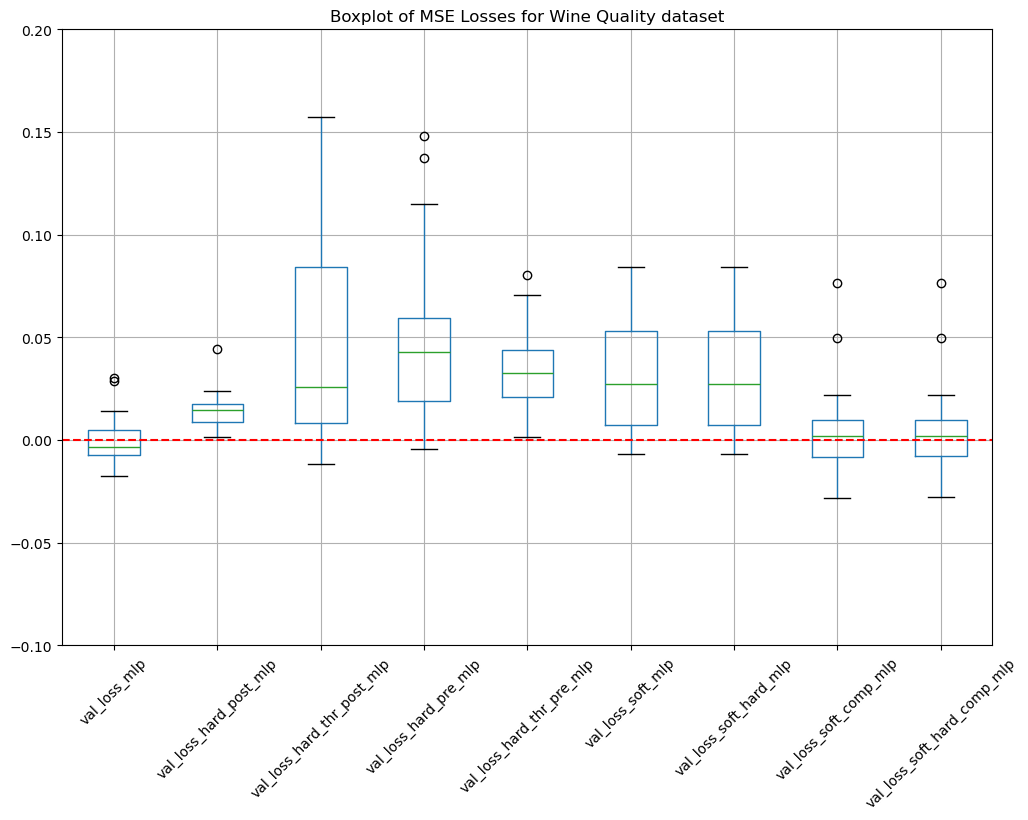

In [121]:
create_boxplot(best_models_wine, 'Wine Quality', y_min=-0.1, y_max=0.2)

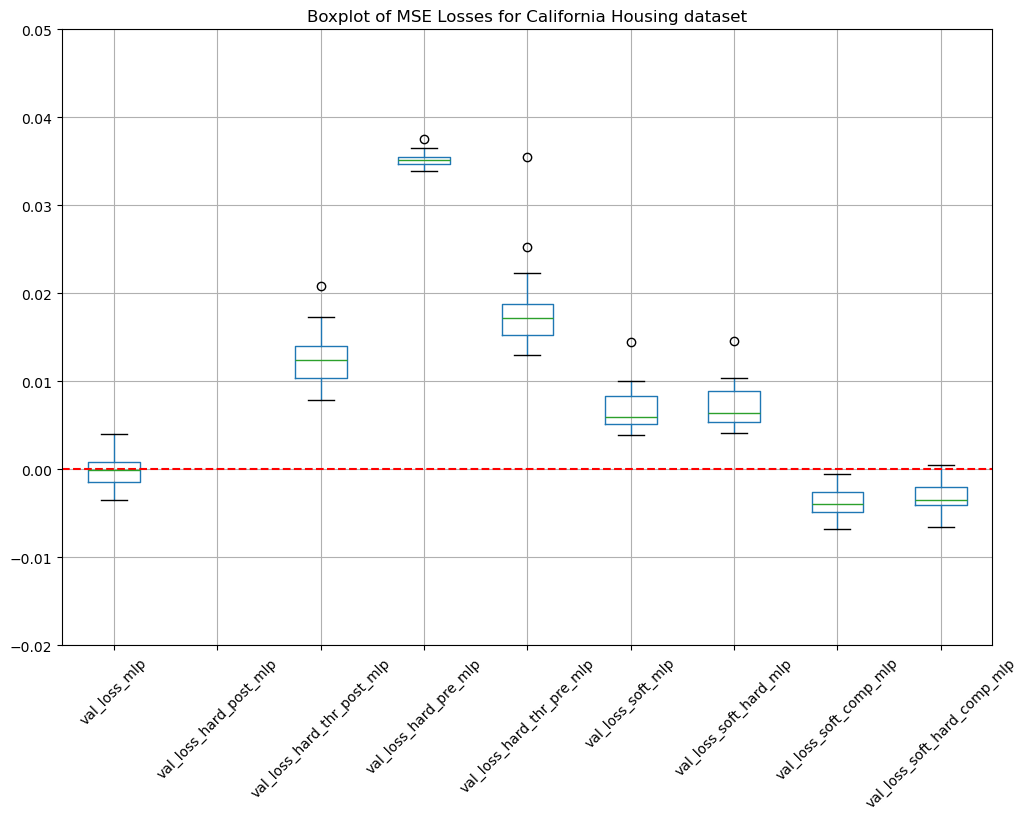

In [ ]:
create_boxplot(best_models_california, 'California Housing', y_min=-0.02, y_max=0.05)

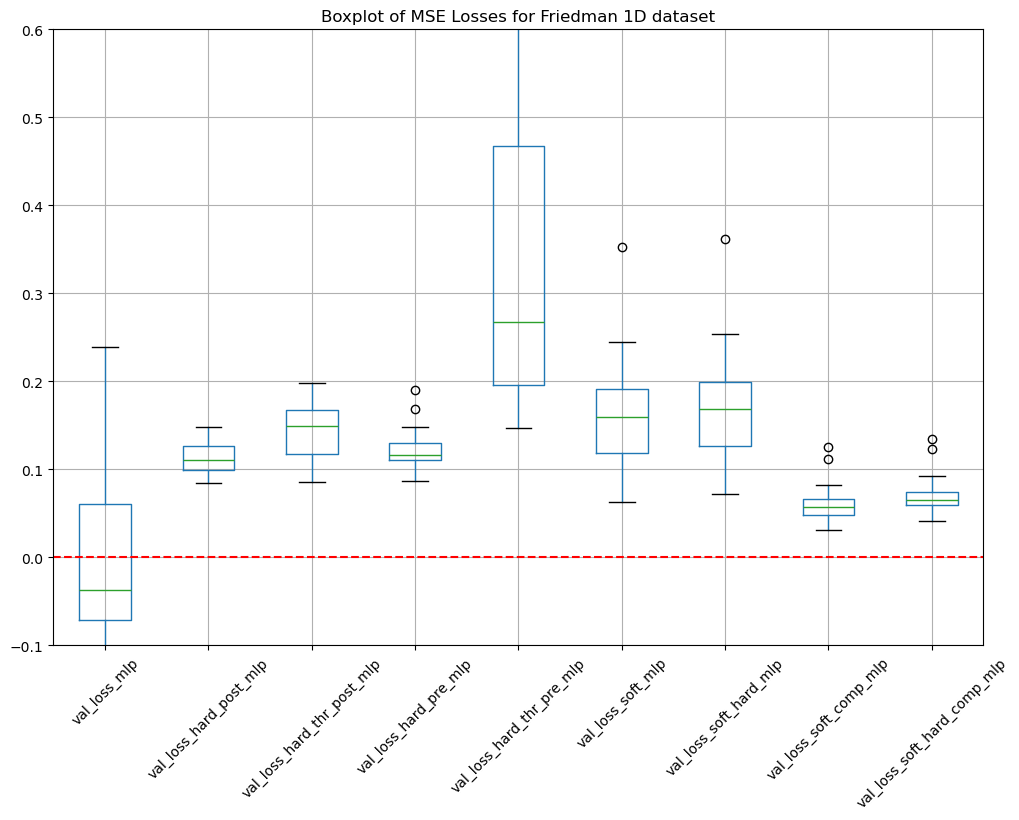

In [127]:

create_boxplot(best_models_fried, 'Friedman 1D', y_min=-0.1, y_max=0.6)

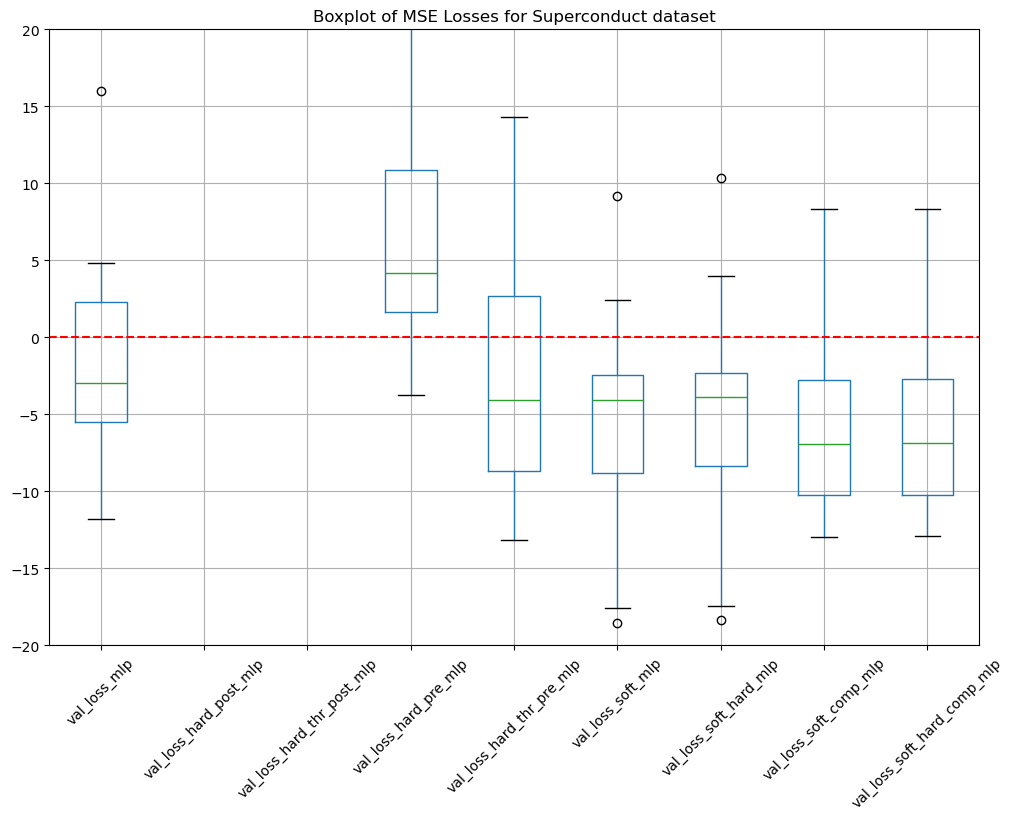

In [174]:
create_boxplot(best_models_superconduct, 'Superconduct',y_min=-20, y_max=20)

In [177]:
from scipy.stats import sem, t
import numpy as np
def calculate_confidence_intervals(df, confidence=0.95):
    columns = df.columns[:-1]  # Exclude the 'dataset' column
    n = len(df)

    for col in columns:
        mean = df[col].mean()
        std_err = sem(df[col])
        margin_of_error = std_err * t.ppf((1 + confidence) / 2, n - 1)
        lower_bound = mean - margin_of_error
        upper_bound = mean + margin_of_error
        print(f"{col}: Mean = {mean:.4f}, 95% CI = ({lower_bound:.4f}, {upper_bound:.4f})")

In [178]:
calculate_confidence_intervals(best_models_wine)

val_loss_mlp: Mean = 0.0000, 95% CI = (-0.0062, 0.0062)
val_loss_hard_post_mlp: Mean = 0.0144, 95% CI = (0.0098, 0.0190)
val_loss_hard_thr_post_mlp: Mean = 0.0439, 95% CI = (0.0208, 0.0670)
val_loss_hard_pre_mlp: Mean = 0.0499, 95% CI = (0.0298, 0.0700)
val_loss_hard_thr_pre_mlp: Mean = 0.0359, 95% CI = (0.0266, 0.0453)
val_loss_soft_mlp: Mean = 0.0884, 95% CI = (-0.0330, 0.2097)
val_loss_soft_hard_mlp: Mean = 0.0884, 95% CI = (-0.0330, 0.2098)
val_loss_soft_comp_mlp: Mean = 0.0053, 95% CI = (-0.0056, 0.0161)
val_loss_soft_hard_comp_mlp: Mean = 0.0053, 95% CI = (-0.0055, 0.0161)


In [179]:
calculate_confidence_intervals(best_models_california)

val_loss_mlp: Mean = 0.0000, 95% CI = (-0.0009, 0.0009)
val_loss_hard_post_mlp: Mean = 0.1482, 95% CI = (0.1350, 0.1615)
val_loss_hard_thr_post_mlp: Mean = 0.0124, 95% CI = (0.0108, 0.0140)
val_loss_hard_pre_mlp: Mean = 0.0352, 95% CI = (0.0348, 0.0356)
val_loss_hard_thr_pre_mlp: Mean = 0.0184, 95% CI = (0.0160, 0.0208)
val_loss_soft_mlp: Mean = 0.0069, 95% CI = (0.0057, 0.0081)
val_loss_soft_hard_mlp: Mean = 0.0073, 95% CI = (0.0061, 0.0084)
val_loss_soft_comp_mlp: Mean = -0.0038, 95% CI = (-0.0045, -0.0030)
val_loss_soft_hard_comp_mlp: Mean = -0.0031, 95% CI = (-0.0039, -0.0023)


In [180]:
calculate_confidence_intervals(best_models_fried)

val_loss_mlp: Mean = -0.0000, 95% CI = (-0.0479, 0.0479)
val_loss_hard_post_mlp: Mean = 0.1123, 95% CI = (0.1039, 0.1207)
val_loss_hard_thr_post_mlp: Mean = 0.1439, 95% CI = (0.1278, 0.1599)
val_loss_hard_pre_mlp: Mean = 0.1235, 95% CI = (0.1124, 0.1345)
val_loss_hard_thr_pre_mlp: Mean = 0.3550, 95% CI = (0.2474, 0.4626)
val_loss_soft_mlp: Mean = 0.1831, 95% CI = (0.1256, 0.2407)
val_loss_soft_hard_mlp: Mean = 0.1918, 95% CI = (0.1341, 0.2495)
val_loss_soft_comp_mlp: Mean = 0.0620, 95% CI = (0.0515, 0.0726)
val_loss_soft_hard_comp_mlp: Mean = 0.0710, 95% CI = (0.0603, 0.0817)


In [181]:
calculate_confidence_intervals(best_models_superconduct)

val_loss_mlp: Mean = 0.0000, 95% CI = (-4.6970, 4.6970)
val_loss_hard_post_mlp: Mean = 55.1763, 95% CI = (51.6319, 58.7208)
val_loss_hard_thr_post_mlp: Mean = 38.7298, 95% CI = (31.6617, 45.7979)
val_loss_hard_pre_mlp: Mean = 8.4438, 95% CI = (3.7569, 13.1307)
val_loss_hard_thr_pre_mlp: Mean = -2.9642, 95% CI = (-6.1474, 0.2190)
val_loss_soft_mlp: Mean = -5.4387, 95% CI = (-8.2784, -2.5989)
val_loss_soft_hard_mlp: Mean = -4.9717, 95% CI = (-7.9058, -2.0377)
val_loss_soft_comp_mlp: Mean = -5.2760, 95% CI = (-8.1146, -2.4374)


In [ ]:
best_models_wine = best_models_wine - best_models_wine['val_loss_mlp'].mean()
best_models_california = best_models_california - best_models_california['val_loss_mlp'].mean()
best_models_fried = best_models_fried - best_models_fried['val_loss_mlp'].mean()


TypeError: unsupported operand type(s) for -: 'str' and 'float'

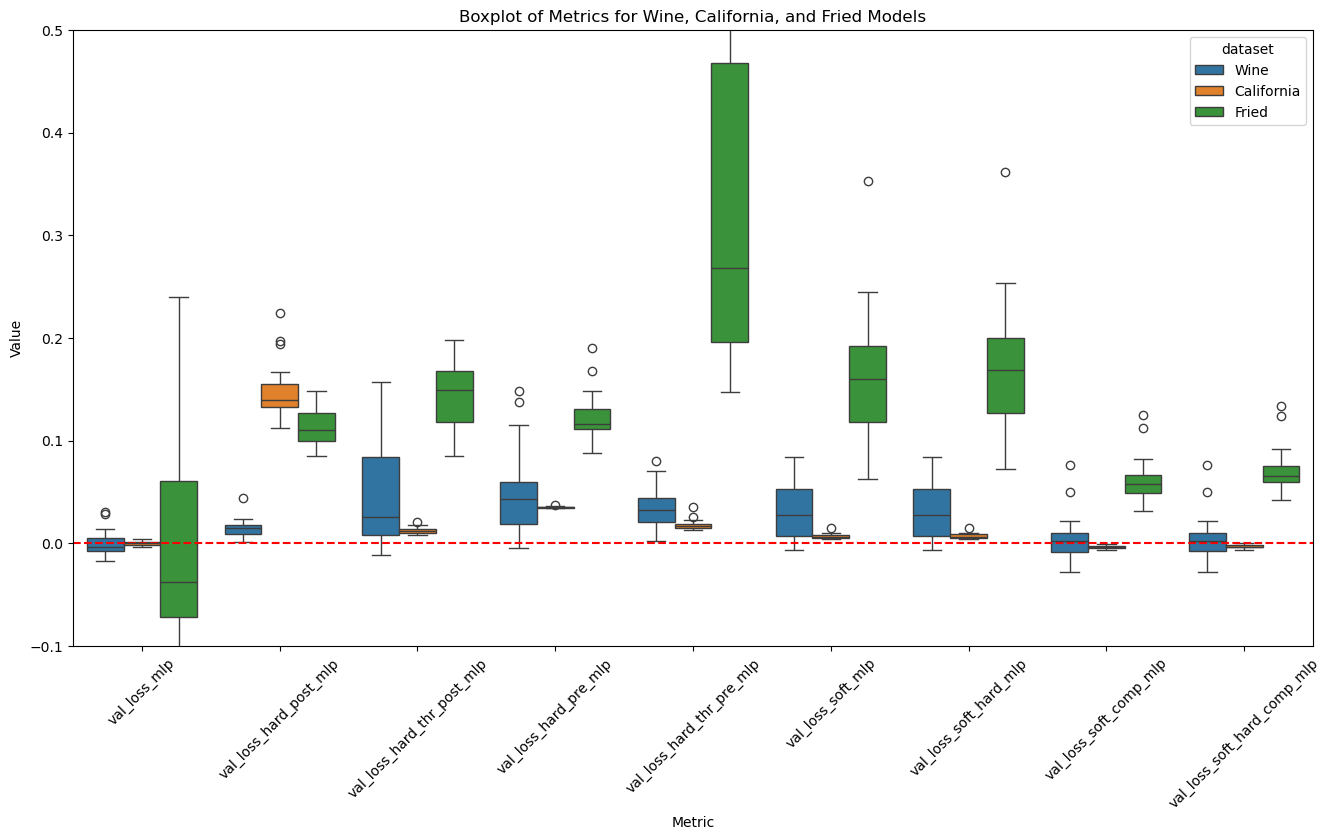

In [109]:
import seaborn as sns

# Add a source column to each DataFrame
best_models_wine['dataset'] = 'Wine'
best_models_california['dataset'] = 'California'
best_models_fried['dataset'] = 'Fried'

# Concatenate the DataFrames
combined_df = pd.concat([best_models_wine, best_models_california, best_models_fried])

# Melt the DataFrame for seaborn boxplot
melted_df = combined_df.melt(id_vars='dataset', var_name='Metric', value_name='Value')

# Create the boxplot
plt.figure(figsize=(16, 8))
sns.boxplot(data=melted_df, x='Metric', y='Value', hue='dataset')
plt.axhline(0, color='red', linestyle='--')
plt.ylim(-0.1,0.5)
plt.xticks(rotation=45)
plt.title('Boxplot of Metrics for Wine, California, and Fried Models')
plt.show()

In [77]:
best_models_wine

,val_loss_mlp,val_loss_hard_post_mlp,val_loss_hard_thr_post_mlp,val_loss_hard_pre_mlp,val_loss_hard_thr_pre_mlp,val_loss_soft_mlp,val_loss_soft_hard_mlp,val_loss_soft_comp_mlp,val_loss_soft_hard_comp_mlp
0,0.449638,0.465470,0.456161,0.515236,0.467600,0.544880,0.441661,0.450661,0.438715
1,0.450912,0.471095,0.485649,0.494469,0.492102,0.486015,0.587507,0.468666,0.433845
2,0.443626,0.478582,0.500741,0.570774,0.474636,0.526605,0.448896,0.469681,0.477759
3,0.434598,0.474340,0.458863,0.524782,0.463667,0.499746,0.479040,0.450686,0.454909
4,0.453657,0.478021,0.477375,0.473819,0.486685,0.497000,0.471639,0.444834,0.451795
5,0.439317,0.475344,0.469630,0.553149,0.505280,0.429891,0.474723,0.460279,0.466158
6,0.448699,0.471289,0.462786,0.477573,0.470656,0.480911,0.466208,0.482802,0.430928
7,0.444303,0.480958,0.491259,0.469065,0.479008,1.367123,0.549331,0.439076,0.433357
8,0.447633,0.463739,0.460178,0.482633,0.525734,0.497451,0.728573,0.413438,0.451827
9,0.460888,0.484764,0.472071,0.686373,0.492305,0.447761,0.506747,0.452637,0.498918


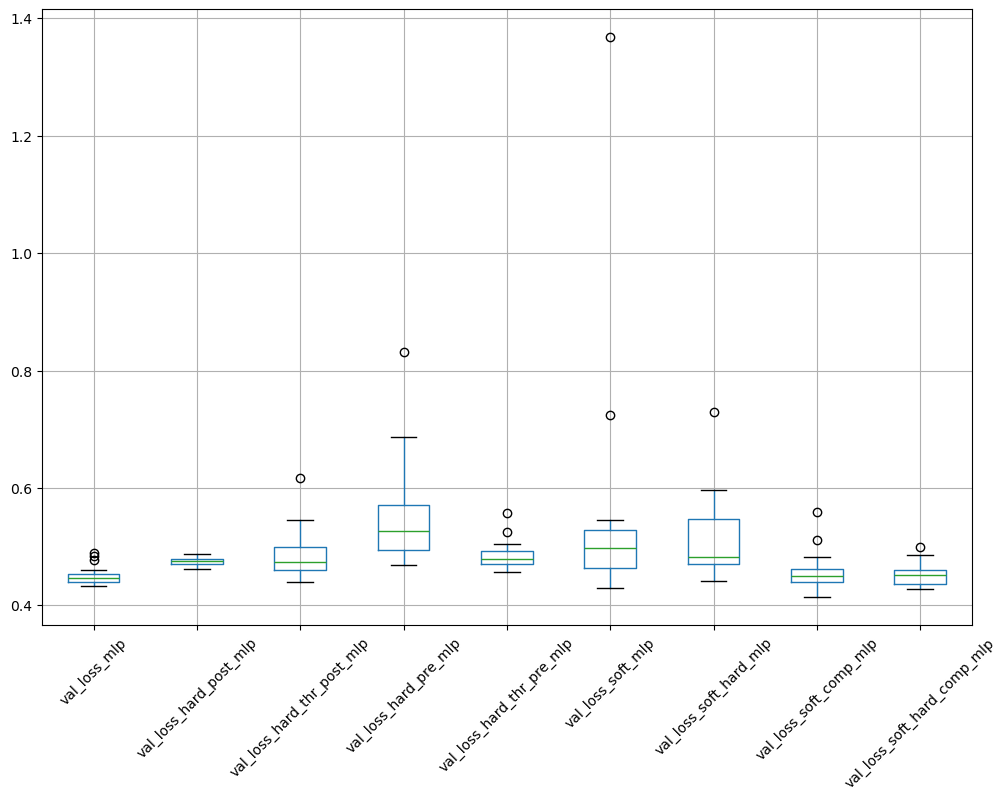

In [78]:
plt.figure(figsize=(12, 8))
best_models_df.boxplot()
plt.xticks(rotation=45)
plt.show()

In [79]:
best_models_df.mean()

val_loss_mlp                   0.450329
val_loss_hard_post_mlp         0.474120
val_loss_hard_thr_post_mlp     0.487489
val_loss_hard_pre_mlp          0.552207
val_loss_hard_thr_pre_mlp      0.485218
val_loss_soft_mlp              0.543344
val_loss_soft_hard_mlp         0.510803
val_loss_soft_comp_mlp         0.456048
val_loss_soft_hard_comp_mlp    0.452689
dtype: float64

## Evaluate different bits

In [148]:
path_wine = r'C:\Users\k_schr40\Downloads\wine_quality_evaluation_from_2_to_8bits_new.csv'
df_wine = pd.read_csv(path_wine)

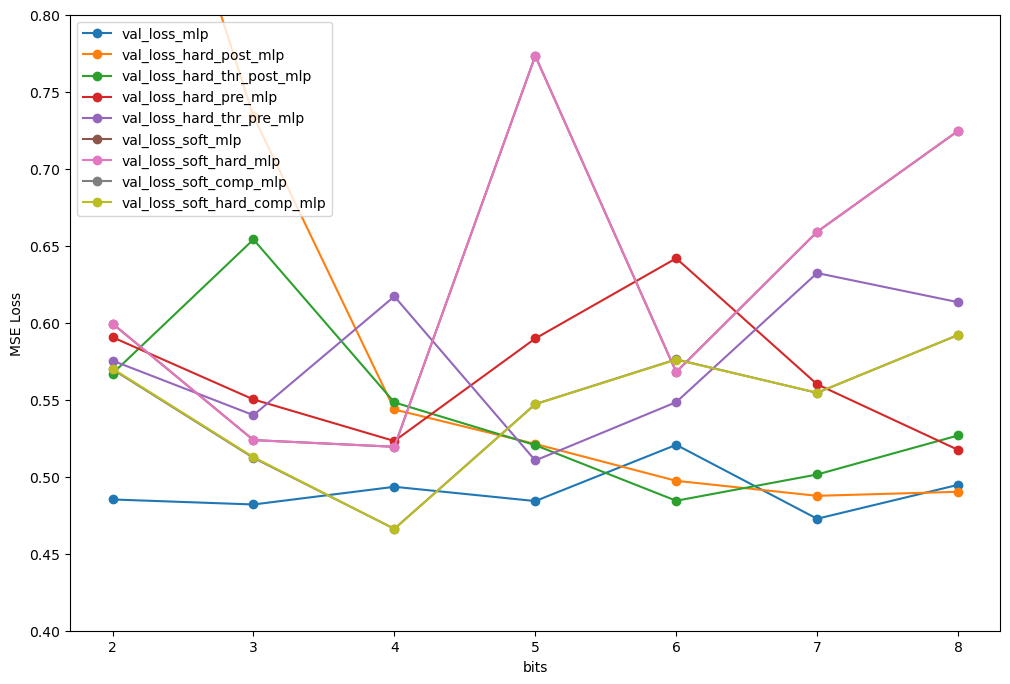

In [149]:
df_wine.plot(x='bits', y=loss_columns, kind='line', marker='o', figsize=(12, 8))
plt.ylim(0.4, 0.8)
plt.ylabel('MSE Loss')
plt.show()

In [135]:
path_california = r'C:\Users\k_schr40\Downloads\california_evaluation_from_2_to_8bits.csv'
df_california = pd.read_csv(path_california)

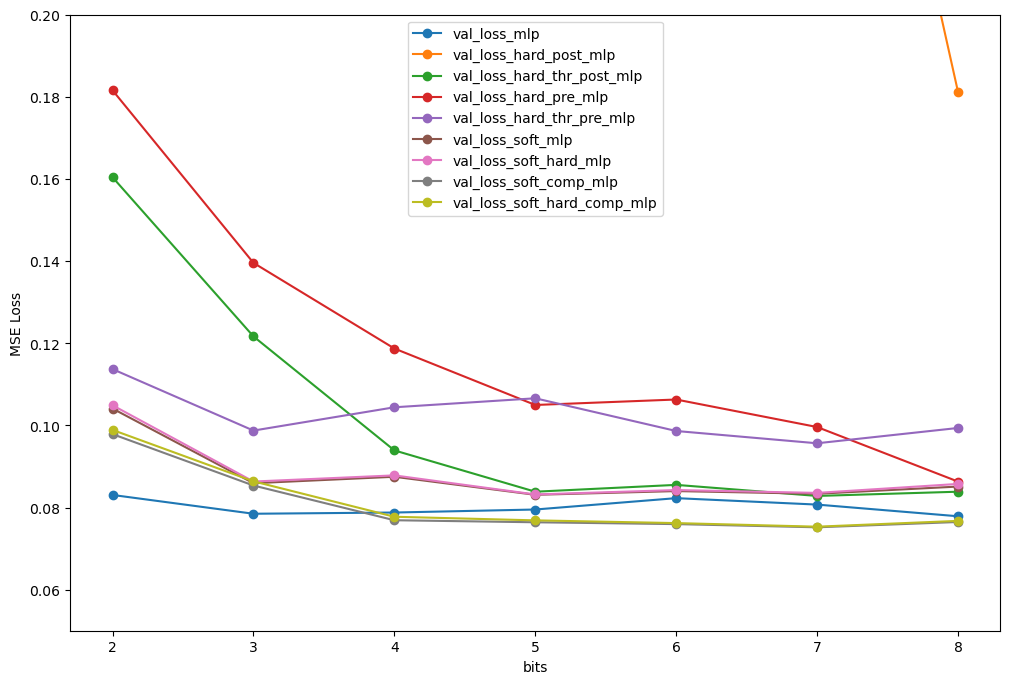

In [139]:
df_california.plot(x='bits', y=loss_columns, kind='line', marker='o', figsize=(12, 8))
plt.ylim(0.05, 0.2)
plt.ylabel('MSE Loss')
plt.show()

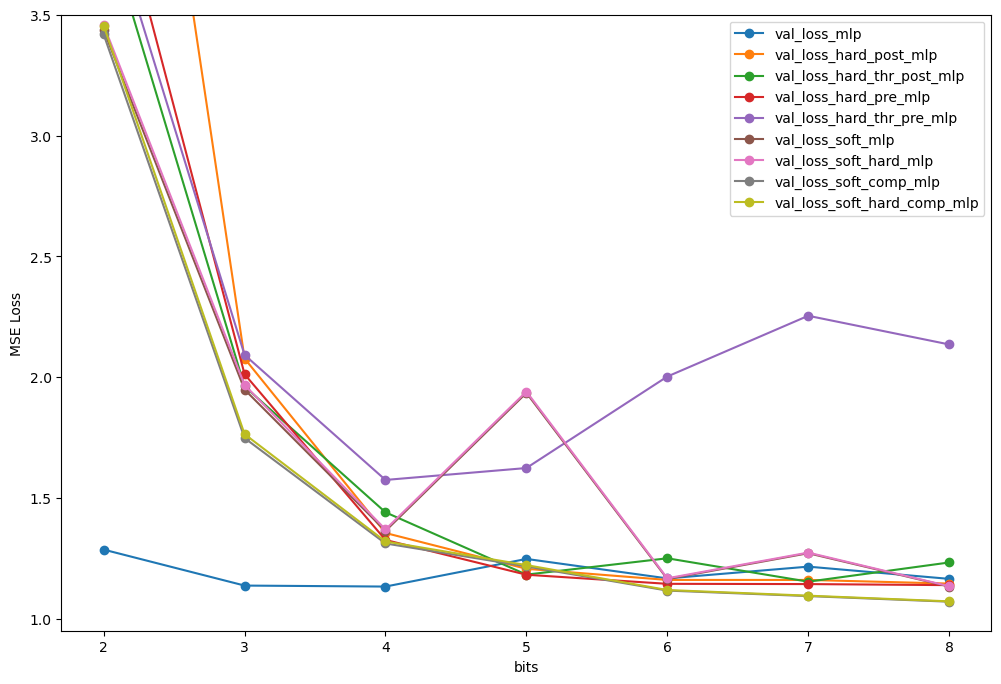

In [143]:
path_fried = r'C:\Users\k_schr40\Downloads\fried_evaluation_from_2_to_8bits.csv'
df_fried = pd.read_csv(path_fried)
df_fried.plot(x='bits', y=loss_columns, kind='line', marker='o', figsize=(12, 8))
plt.ylim(0.95, 3.5)
plt.ylabel('MSE Loss')
plt.show()

In [165]:
path_superconduct = r'C:\Users\k_schr40\Downloads\superconduct_evaluation_from_2_to_8bits_new.csv'
df_superconduct = pd.read_csv(path_superconduct)

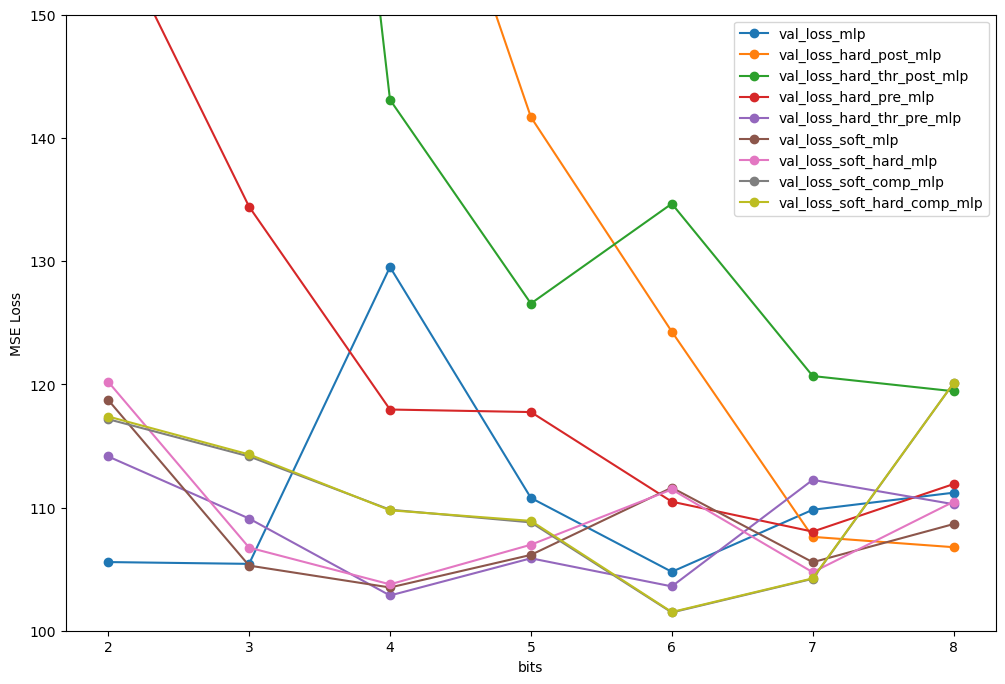

In [167]:
df_superconduct.plot(x='bits', y=loss_columns, kind='line', marker='o', figsize=(12, 8))
plt.ylim(100, 150)
plt.ylabel('MSE Loss')
plt.show()

## Multiple Hyperparametertunings for different bits

NameError: name 'df_california' is not defined

In [3]:
df_min = pd.DataFrame()
for f in [2,3,4,5,6,7,8]:
    path_california = r'C:\Users\k_schr40\Downloads\california_hyperparameter_tuning_{}bits_100steps.csv'.format(f)
    df_california = pd.read_csv(path_california)
    loss_columns = [col for col in df_california.columns if 'loss' in col]
    df_cal_min = df_california.min(axis=0)
    df_cal_min = pd.DataFrame(df_cal_min).T[loss_columns]
    df_cal_min['bits'] = f
    df_min = pd.concat([df_min, df_cal_min], axis=0)

In [5]:
pd.DataFrame(df_cal_min).T

,weight_decay,learning_rate,hidden_layers,hidden_neurons,num_epochs,decrease_factor,val_loss_mlp,val_loss_hard_post_mlp,val_loss_hard_thr_post_mlp,val_loss_hard_pre_mlp,val_loss_hard_thr_pre_mlp,val_loss_soft_mlp,val_loss_soft_hard_mlp,val_loss_soft_comp_mlp,val_loss_soft_hard_comp_mlp
0,0.0,0.0001,5.0,64.0,30.0,0.0001,0.088679,0.193821,0.089368,0.111964,0.102796,0.088786,0.088855,0.081383,0.081472


In [17]:
df_min

,val_loss_mlp,val_loss_hard_post_mlp,val_loss_hard_thr_post_mlp,val_loss_hard_pre_mlp,val_loss_hard_thr_pre_mlp,val_loss_soft_mlp,val_loss_soft_hard_mlp,val_loss_soft_comp_mlp,val_loss_soft_hard_comp_mlp,bits
0,0.086797,0.284735,0.141867,0.187567,0.120134,0.105254,0.105080,0.103919,0.104640,2
0,0.082508,0.212660,0.116274,0.139513,0.100552,0.087105,0.087208,0.084797,0.084876,3
0,0.083785,0.189790,0.094649,0.124056,0.101712,0.087044,0.087358,0.081845,0.082308,4
0,0.088679,0.193821,0.089368,0.111964,0.102796,0.088786,0.088855,0.081383,0.081472,6


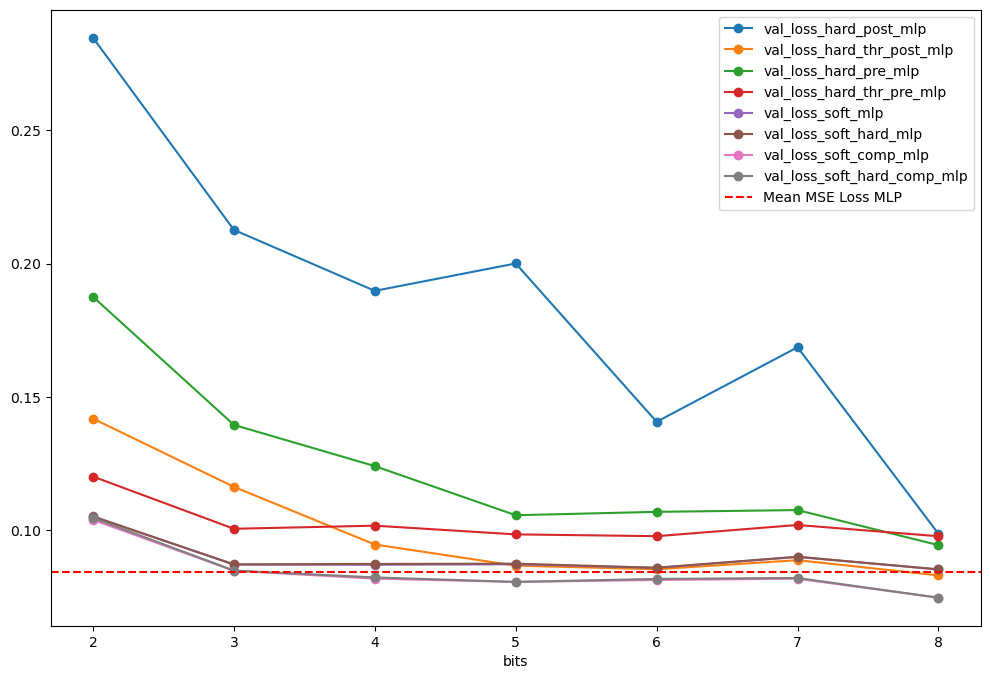

In [4]:
df_min.plot(x = 'bits', y = [col for col in loss_columns if col!='val_loss_mlp'], kind='line', marker='o', figsize=(12, 8))
plt.axhline(y = df_min['val_loss_mlp'].mean(), color='red', linestyle='--', label='Mean MSE Loss MLP')
plt.legend()
plt.show()

In [8]:
df_min = pd.DataFrame()
for f in [2,3,4,5,6,7]:
    path_fried = r'C:\Users\k_schr40\Downloads\fried_hyperparameter_tuning_{}bits_100steps.csv'.format(f)
    df_fried = pd.read_csv(path_fried)
    loss_columns = [col for col in df_fried.columns if 'loss' in col]
    df_fried_min = df_fried.min(axis=0)
    df_fried_min = pd.DataFrame(df_fried_min).T[loss_columns]
    df_fried_min['bits'] = f
    df_min = pd.concat([df_min, df_fried_min], axis=0)

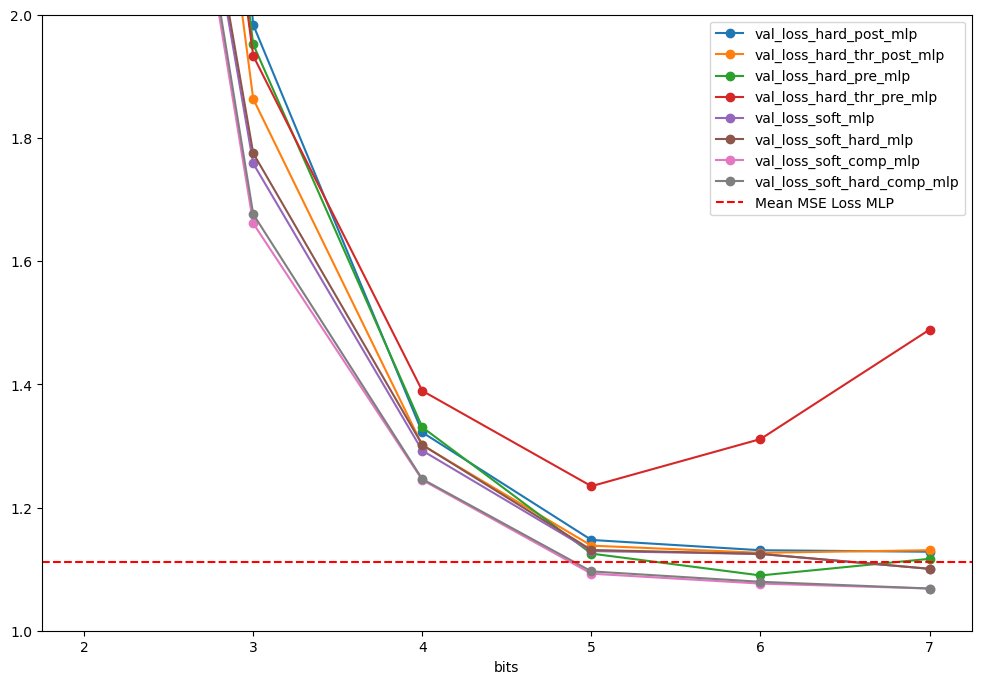

In [17]:
df_min.plot(x = 'bits', y = [col for col in loss_columns if col!='val_loss_mlp'], kind='line', marker='o', figsize=(12, 8))
plt.ylim(1,2)
plt.axhline(y = df_min['val_loss_mlp'].mean(), color='red', linestyle='--', label='Mean MSE Loss MLP')
plt.legend()
plt.show()

## Multiple Runs for multiple bits

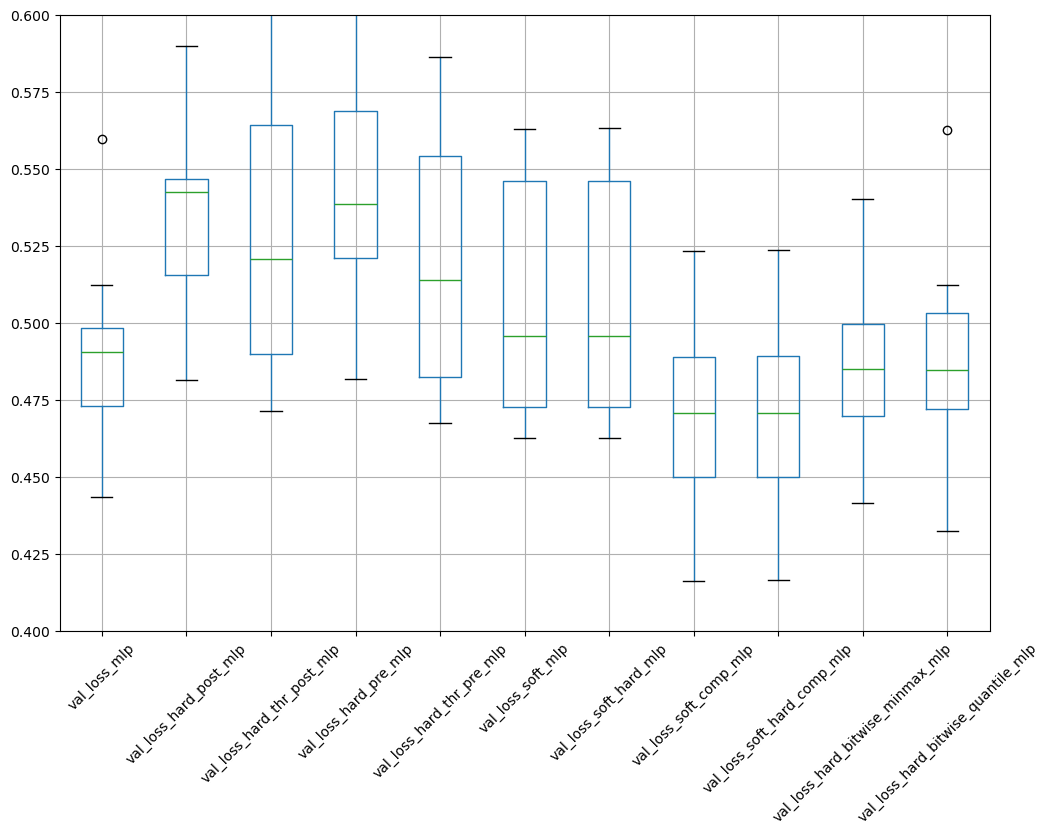

In [51]:
dataset = 'wine_quality'
path_df = r'C:\Users\k_schr40\Downloads\{}_best_models__4bits_20runs_ext.csv'.format(dataset)
df = pd.read_csv(path_df)
loss_columns = [col for col in df.columns if 'loss' in col]
df[loss_columns].boxplot(figsize=(12, 8))
plt.xticks(rotation=45)
plt.ylim(0.4, 0.6)
plt.show()

In [45]:
dataset = 'wine_quality'
path_df = r'C:\Users\k_schr40\Downloads\{}_hyperparameter_tuning_4bits_100steps_extended100.csv'.format(dataset)
df_hyp = pd.read_csv(path_df)
df_hyp[loss_columns].min(axis=0)

val_loss_mlp                          0.481910
val_loss_hard_post_mlp                0.514256
val_loss_hard_thr_post_mlp            0.494607
val_loss_hard_pre_mlp                 0.491118
val_loss_hard_thr_pre_mlp             0.497918
val_loss_soft_mlp                     0.493806
val_loss_soft_hard_mlp                0.493782
val_loss_soft_comp_mlp                0.459077
val_loss_soft_hard_comp_mlp           0.459123
val_loss_hard_bitwise_minmax_mlp      0.471831
val_loss_hard_bitwise_quantile_mlp    0.445002
dtype: float64

## Additional tests on California Housing

In [20]:
path_california = r'C:\\Users\\k_schr40\\Downloads\\california_hyperparameter_tuning_4bits_100steps.csv'

In [21]:
df_california = pd.read_csv(path_california)

In [30]:
datasets = ['wine_quality', 'california', 'fried', 'superconduct']
for dataset in datasets:
    path = r'C:\Users\k_schr40\Downloads\{}_hyperparameter_tuning_4bits_100steps.csv'.format(dataset)
    df = pd.read_csv(path)
    path_additional = r'C:\Users\k_schr40\Downloads\{}_hyperparameter_tuning_4bits_100steps_additional.csv'.format(dataset)
    df_additional = pd.read_csv(path_additional)
    df[df_additional.columns[-1]] = df_additional[df_additional.columns[-1]]
    print(dataset)
    print(df[loss_columns].min(axis=0))

wine_quality
val_loss_mlp                   0.481910
val_loss_hard_post_mlp         0.514256
val_loss_hard_thr_post_mlp     0.494607
val_loss_hard_pre_mlp          0.491118
val_loss_hard_thr_pre_mlp      0.497918
val_loss_soft_mlp              0.493806
val_loss_soft_hard_mlp         0.493782
val_loss_soft_comp_mlp         0.459077
val_loss_soft_hard_comp_mlp    0.459123
val_loss_hard_comp_mlp         0.465567
dtype: float64
california
val_loss_mlp                   0.083785
val_loss_hard_post_mlp         0.189790
val_loss_hard_thr_post_mlp     0.094649
val_loss_hard_pre_mlp          0.124056
val_loss_hard_thr_pre_mlp      0.101712
val_loss_soft_mlp              0.087044
val_loss_soft_hard_mlp         0.087358
val_loss_soft_comp_mlp         0.081845
val_loss_soft_hard_comp_mlp    0.082308
val_loss_hard_comp_mlp         0.087254
dtype: float64
fried
val_loss_mlp                   1.124084
val_loss_hard_post_mlp         1.321973
val_loss_hard_thr_post_mlp     1.301093
val_loss_hard_pre_ml

In [22]:
path_california_additional = r'C:\\Users\\k_schr40\\Downloads\\california_hyperparameter_tuning_4bits_100steps_additional.csv'
df_california_additional = pd.read_csv(path_california_additional)

In [23]:
df_california_additional.columns[-1]

'val_loss_hard_comp_mlp'

In [24]:
df_california[df_california_additional.columns[-1]] = df_california_additional[df_california_additional.columns[-1]]

In [25]:
loss_columns = [col for col in df_california.columns if 'loss' in col]

In [26]:
df_california[loss_columns].min(axis=0)

val_loss_mlp                   0.083785
val_loss_hard_post_mlp         0.189790
val_loss_hard_thr_post_mlp     0.094649
val_loss_hard_pre_mlp          0.124056
val_loss_hard_thr_pre_mlp      0.101712
val_loss_soft_mlp              0.087044
val_loss_soft_hard_mlp         0.087358
val_loss_soft_comp_mlp         0.081845
val_loss_soft_hard_comp_mlp    0.082308
val_loss_hard_comp_mlp         0.087254
dtype: float64

## BNG wisconsin

In [52]:
path_df = r'../results\BNG(wisconsin)_best_models__4bits_20runs_ext.csv'
df_bng = pd.read_csv(path_df)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(1, 0, 'val_loss_mlp'),
  Text(2, 0, 'val_loss_hard_post_mlp'),
  Text(3, 0, 'val_loss_hard_thr_post_mlp'),
  Text(4, 0, 'val_loss_hard_pre_mlp'),
  Text(5, 0, 'val_loss_hard_thr_pre_mlp'),
  Text(6, 0, 'val_loss_soft_mlp'),
  Text(7, 0, 'val_loss_soft_hard_mlp'),
  Text(8, 0, 'val_loss_soft_comp_mlp'),
  Text(9, 0, 'val_loss_soft_hard_comp_mlp'),
  Text(10, 0, 'val_loss_hard_bitwise_minmax_mlp'),
  Text(11, 0, 'val_loss_hard_bitwise_quantile_mlp')])

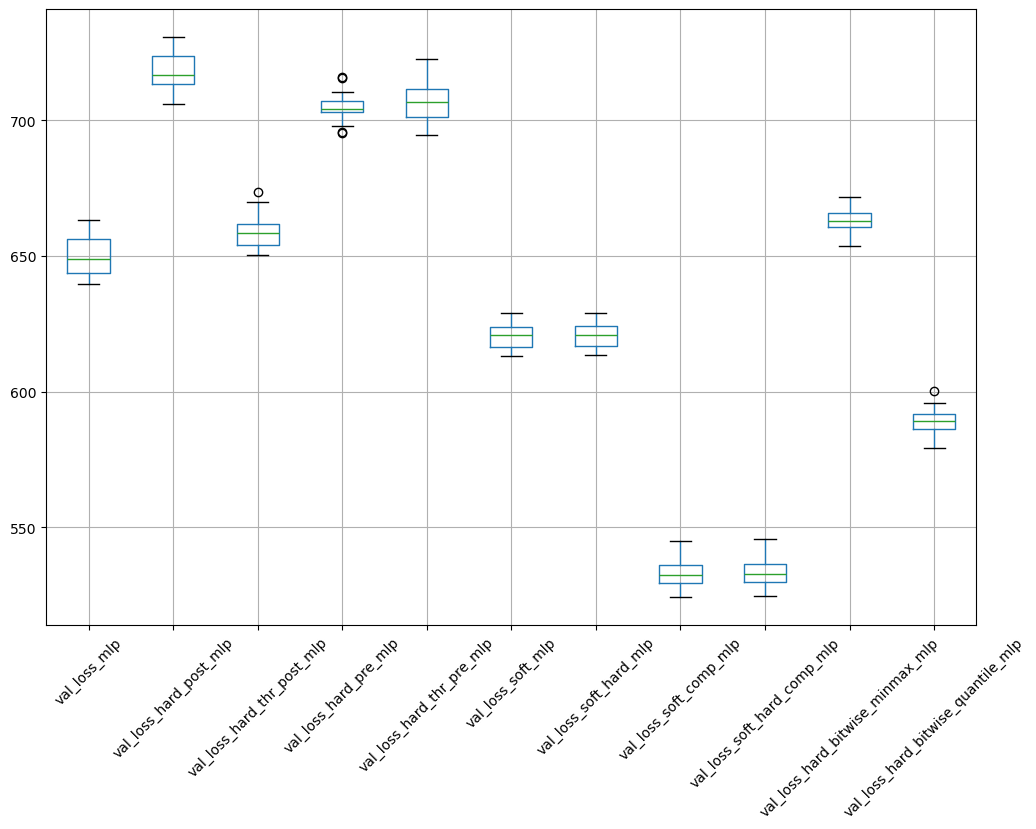

In [54]:
loss_columns = [col for col in df_bng.columns if 'loss' in col]
df_bng[loss_columns].boxplot(figsize=(12, 8))
plt.xticks(rotation=45)

## superconduct

In [ ]:
import warnings

warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)
dataset = 'superconduct'

df_hyp = pd.DataFrame()
for f in range(2,9):
    path_df = r'../results\{}_hyperparameter_tuning_{}bits_100steps_extended100.csv'.format(dataset, f)
    df_current = pd.read_csv(path_df)
    loss_columns = [col for col in df_current.columns if 'loss' in col]
    for loss_col in loss_columns:
        df_current_sorted = df_current.sort_values(by=loss_col, ascending=True)
        df_new = df_current_sorted.iloc[:1]
        df_new['optimal_loss'] = [loss_col]
        df_new['bits'] = f
        df_hyp = pd.concat([df_hyp, df_new], axis=0)

hyperparameter_columns = ['weight_decay', 'learning_rate', 'hidden_layers', 'hidden_neurons', 'num_epochs']
df_hyp[hyperparameter_columns] = (df_hyp[hyperparameter_columns] - df_hyp[hyperparameter_columns].min(axis=0)) / (df_hyp[hyperparameter_columns].max(axis=0) - df_hyp[hyperparameter_columns].min(axis=0))        

In [84]:
df_hyp

,weight_decay,learning_rate,hidden_layers,hidden_neurons,num_epochs,decrease_factor,val_loss_mlp,val_loss_hard_post_mlp,val_loss_hard_thr_post_mlp,val_loss_hard_pre_mlp,val_loss_hard_thr_pre_mlp,val_loss_soft_mlp,val_loss_soft_hard_mlp,val_loss_soft_comp_mlp,val_loss_soft_hard_comp_mlp,val_loss_hard_bitwise_minmax_mlp,val_loss_hard_bitwise_quantile_mlp,optimal_loss,bits
0,0.0,0.0,0.6,1.000000,70,0.0010,105.531965,802.880977,534.335818,181.288554,115.604518,154.486697,156.760397,108.462090,109.398977,172.445426,127.387950,val_loss_mlp,2
98,0.0,0.0,1.0,0.000000,30,0.0001,197.102401,497.650136,414.080747,228.922191,212.952098,188.675859,188.447167,170.264781,170.531323,237.239807,181.077125,val_loss_hard_post_mlp,2
18,1.0,1.0,1.0,0.055118,70,0.0001,113.813346,642.531272,289.444629,165.501440,121.753604,128.733243,128.912305,124.798926,124.896283,174.558463,212.501780,val_loss_hard_thr_post_mlp,2
13,1.0,0.0,0.6,1.000000,50,0.0010,112.726858,970.625853,633.778004,158.011628,124.038759,111.128539,113.152617,115.592722,118.659203,180.871664,163.716996,val_loss_hard_pre_mlp,2
34,0.0,0.0,0.6,1.000000,70,0.0001,123.967228,710.476852,555.839913,160.594948,112.196660,113.410836,113.628625,109.145089,109.367893,169.377138,115.260013,val_loss_hard_thr_pre_mlp,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,1.0,0.0,1.0,0.496063,70,0.0001,110.252791,111.049865,117.826048,107.950791,101.807849,95.415329,95.438552,98.547916,98.525367,149.960907,169.420422,val_loss_soft_hard_mlp,8
35,0.0,0.0,0.6,0.055118,70,0.0010,118.647162,118.785487,131.105318,119.430929,98.383311,102.047701,104.147487,93.395359,93.628215,132.376362,106.071626,val_loss_soft_comp_mlp,8
35,0.0,0.0,0.6,0.055118,70,0.0010,118.647162,118.785487,131.105318,119.430929,98.383311,102.047701,104.147487,93.395359,93.628215,132.376362,106.071626,val_loss_soft_hard_comp_mlp,8
37,0.0,0.0,1.0,0.244094,70,0.0010,118.938293,120.893227,167.387870,100.310882,108.672841,115.643701,116.196470,112.117783,112.286500,108.691481,115.121457,val_loss_hard_bitwise_minmax_mlp,8


In [83]:
print(los_col)
df_hyp[df_hyp['optimal_loss'] == loss_col]

val_loss_hard_bitwise_quantile_mlp


,weight_decay,learning_rate,hidden_layers,hidden_neurons,num_epochs,decrease_factor,val_loss_mlp,val_loss_hard_post_mlp,val_loss_hard_thr_post_mlp,val_loss_hard_pre_mlp,val_loss_hard_thr_pre_mlp,val_loss_soft_mlp,val_loss_soft_hard_mlp,val_loss_soft_comp_mlp,val_loss_soft_hard_comp_mlp,val_loss_hard_bitwise_minmax_mlp,val_loss_hard_bitwise_quantile_mlp,optimal_loss,bits
21,0.0,0.0,0.0,0.496063,70,0.0010,115.593228,586.092893,450.714611,163.085863,114.051833,107.143594,108.602872,107.255002,109.111152,172.682506,109.981949,val_loss_hard_bitwise_quantile_mlp,2
1,0.0,0.0,0.2,1.000000,70,0.0010,99.628858,345.393737,276.351064,125.024878,116.048085,104.655359,105.272533,117.249386,117.606654,154.228171,105.156843,val_loss_hard_bitwise_quantile_mlp,3
52,0.0,0.0,1.0,1.000000,70,0.0001,134.790981,246.746595,254.346684,125.900086,109.021426,106.165279,106.284013,110.693567,110.670798,133.243982,102.691560,val_loss_hard_bitwise_quantile_mlp,4
7,0.0,0.0,1.0,1.000000,70,0.0010,104.206084,129.836587,148.169641,116.765115,105.055923,131.076475,129.677661,95.826376,96.366288,124.273870,101.834280,val_loss_hard_bitwise_quantile_mlp,5
15,0.0,0.0,0.2,1.000000,70,0.0010,123.136425,132.553248,151.621209,140.614755,122.734212,113.738818,113.257253,112.539939,112.798000,116.329509,103.731501,val_loss_hard_bitwise_quantile_mlp,6
31,0.0,1.0,0.0,0.118110,50,0.0010,117.888622,119.542565,121.973466,133.024205,145.438022,118.927241,119.001236,109.529667,109.856005,135.218541,104.126414,val_loss_hard_bitwise_quantile_mlp,7
4,0.0,0.0,0.2,1.000000,70,0.0010,105.858742,107.318383,133.530970,102.983303,105.629870,108.481502,108.903690,100.630878,100.808975,153.010582,104.989024,val_loss_hard_bitwise_quantile_mlp,8


In [72]:
loss_columns

['val_loss_mlp',
 'val_loss_hard_post_mlp',
 'val_loss_hard_thr_post_mlp',
 'val_loss_hard_pre_mlp',
 'val_loss_hard_thr_pre_mlp',
 'val_loss_soft_mlp',
 'val_loss_soft_hard_mlp',
 'val_loss_soft_comp_mlp',
 'val_loss_soft_hard_comp_mlp',
 'val_loss_hard_bitwise_minmax_mlp',
 'val_loss_hard_bitwise_quantile_mlp']

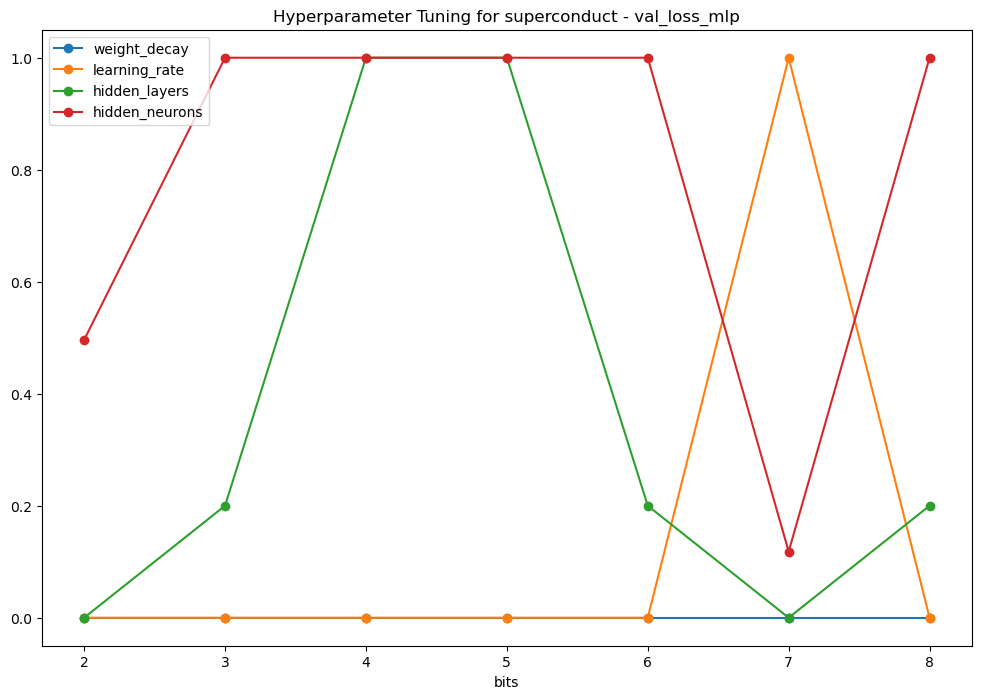

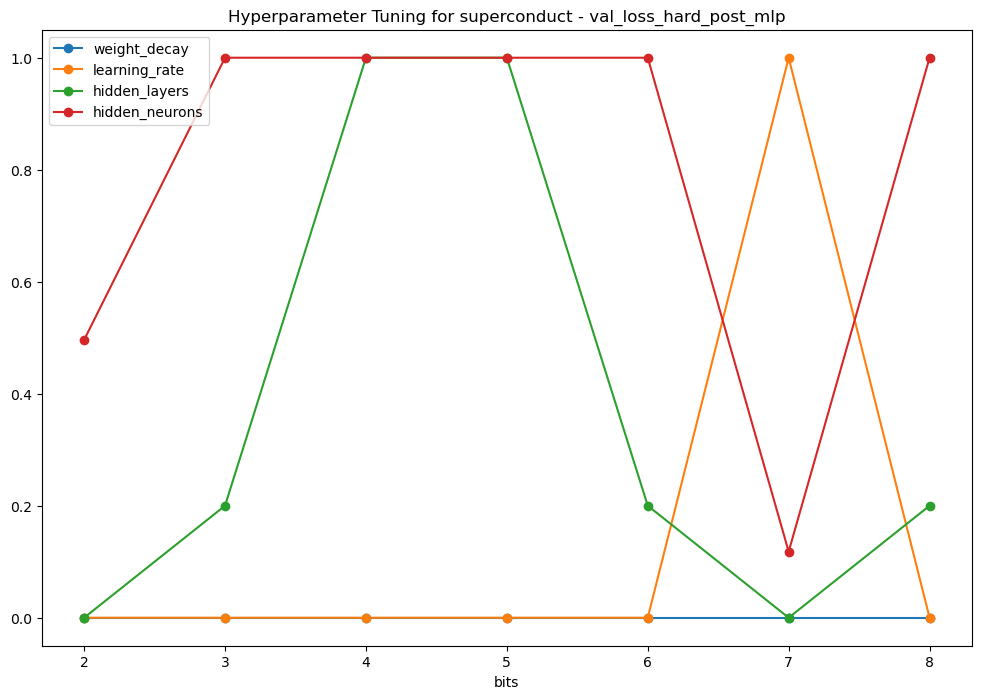

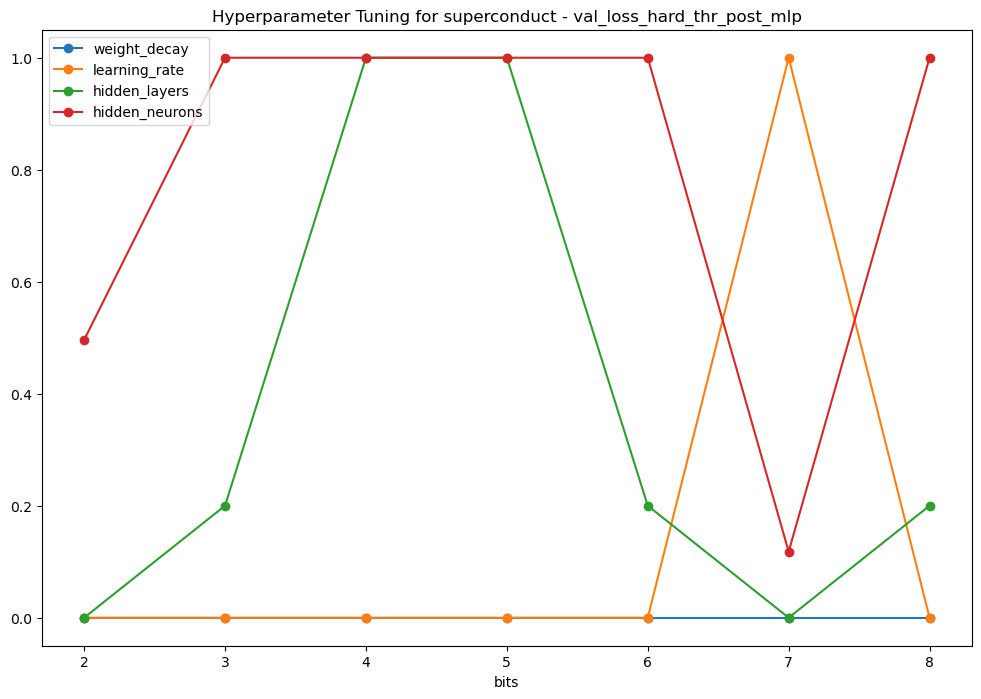

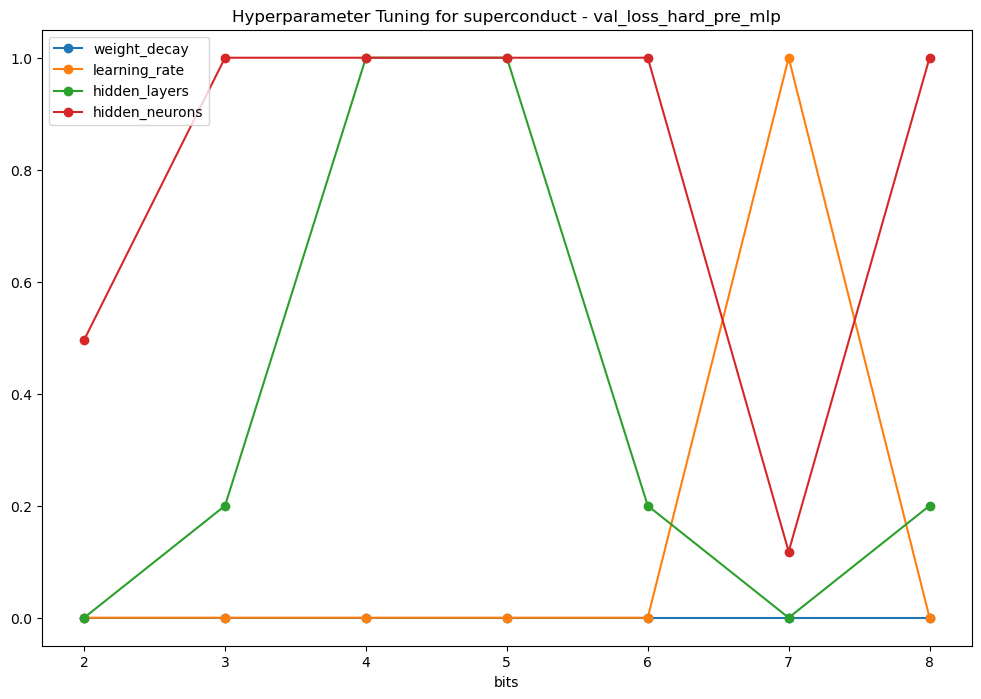

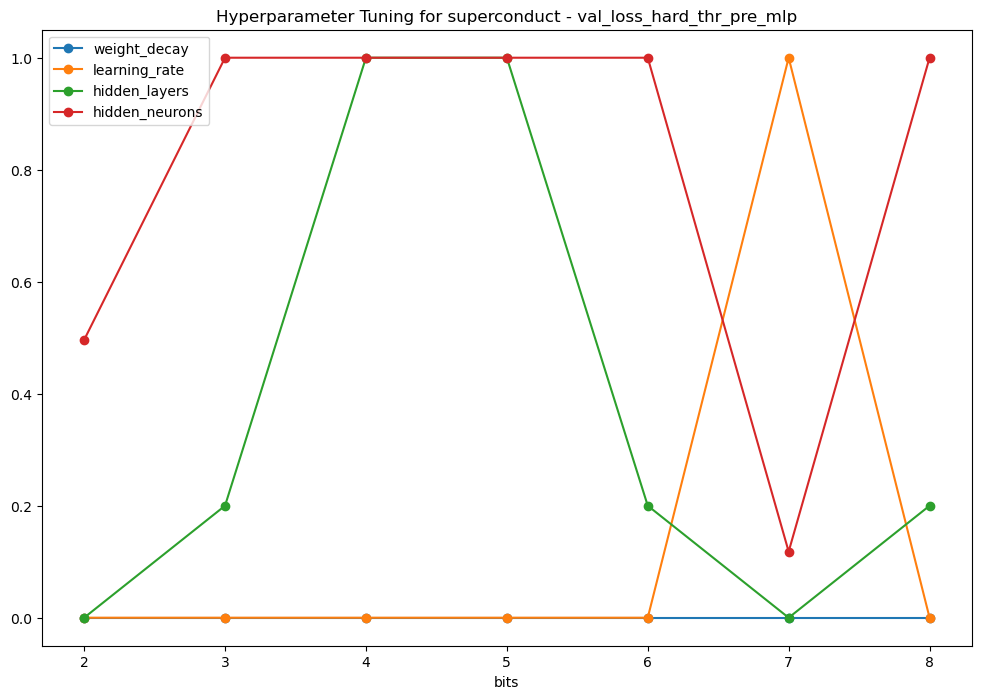

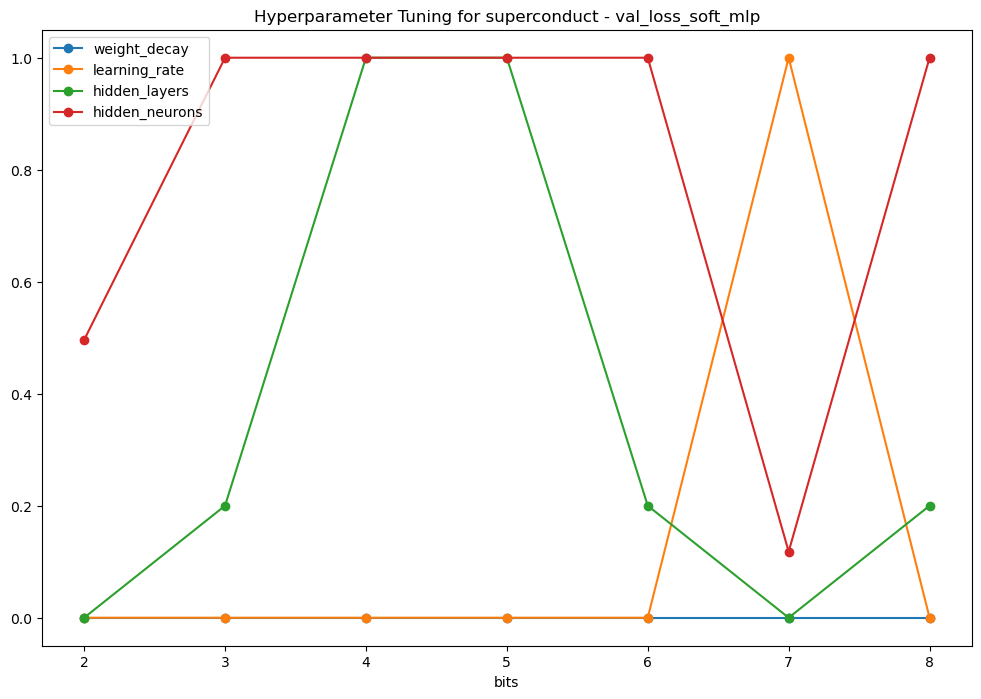

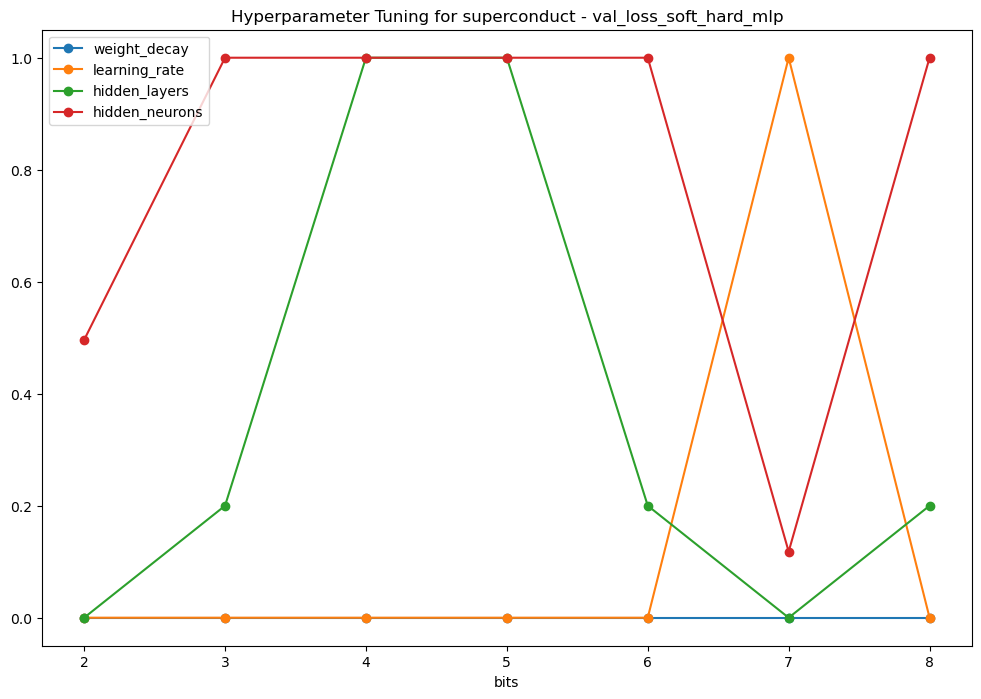

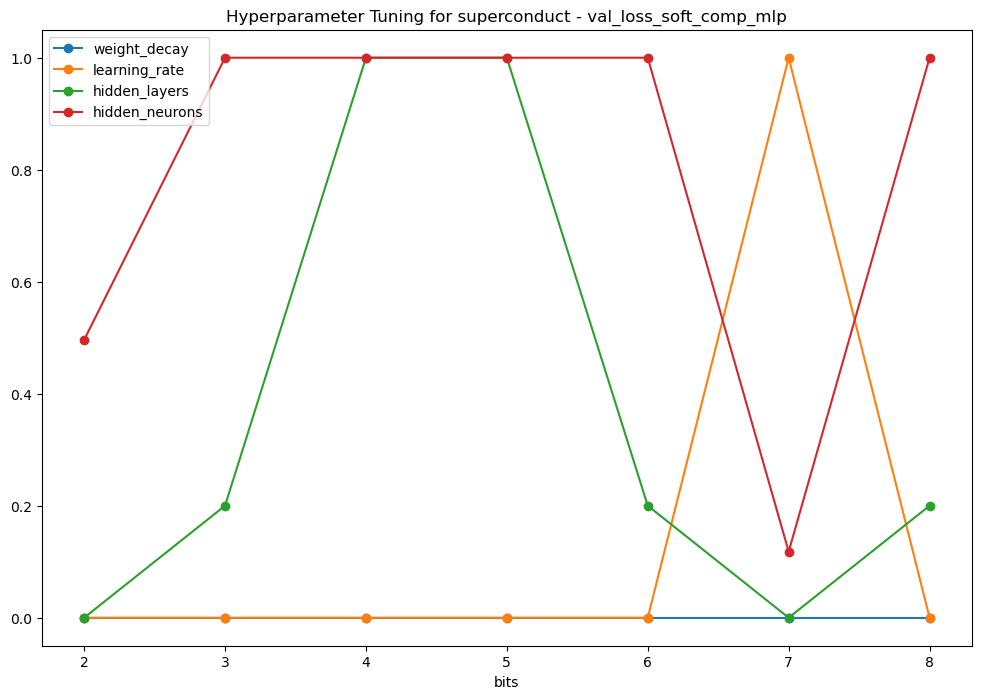

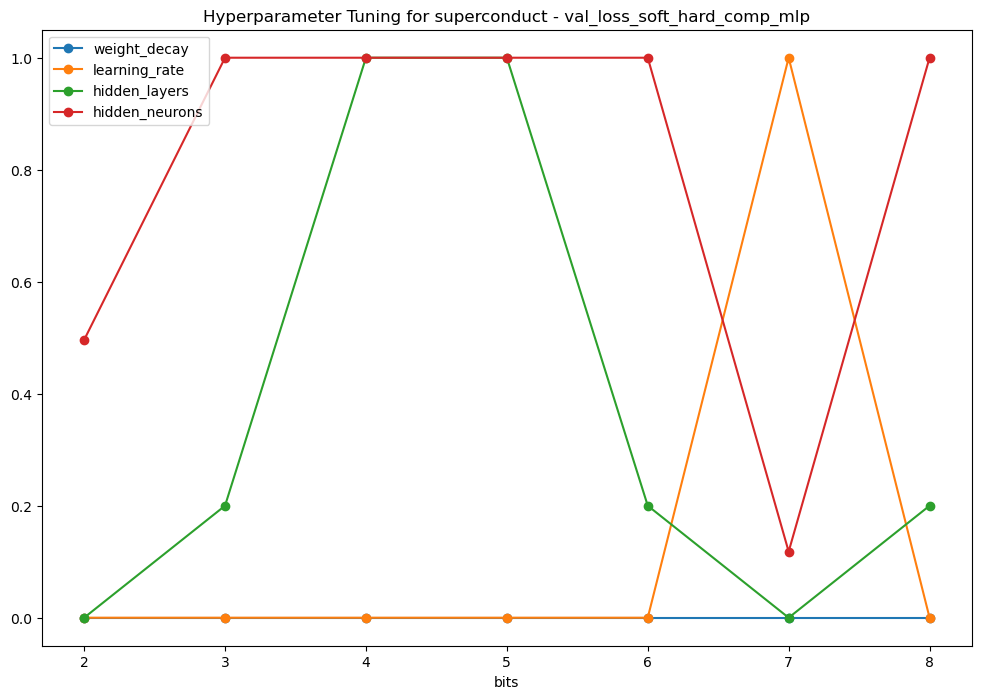

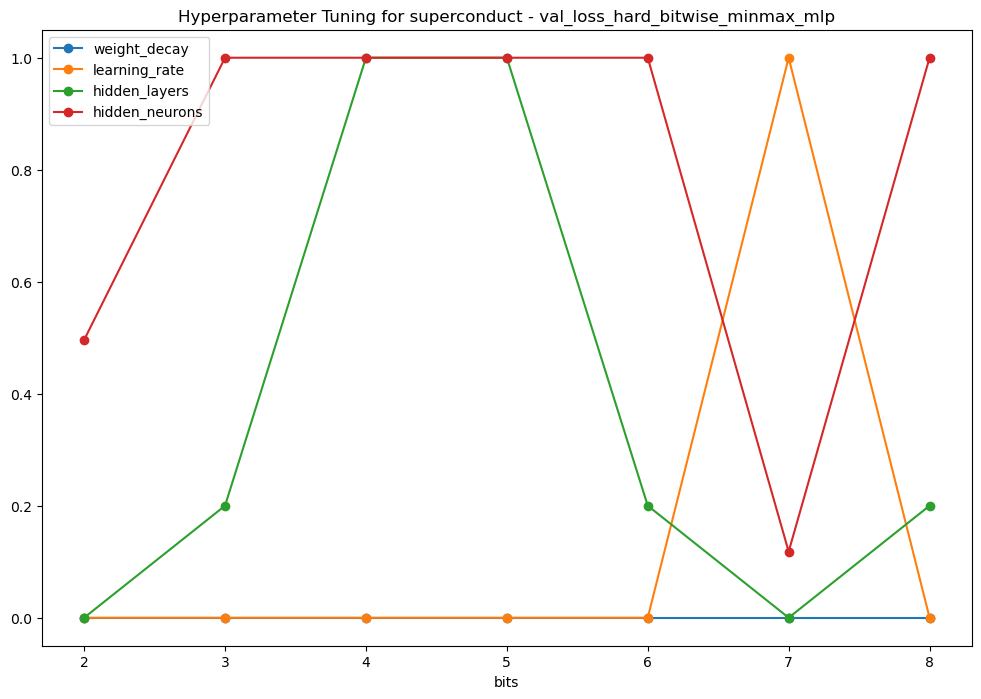

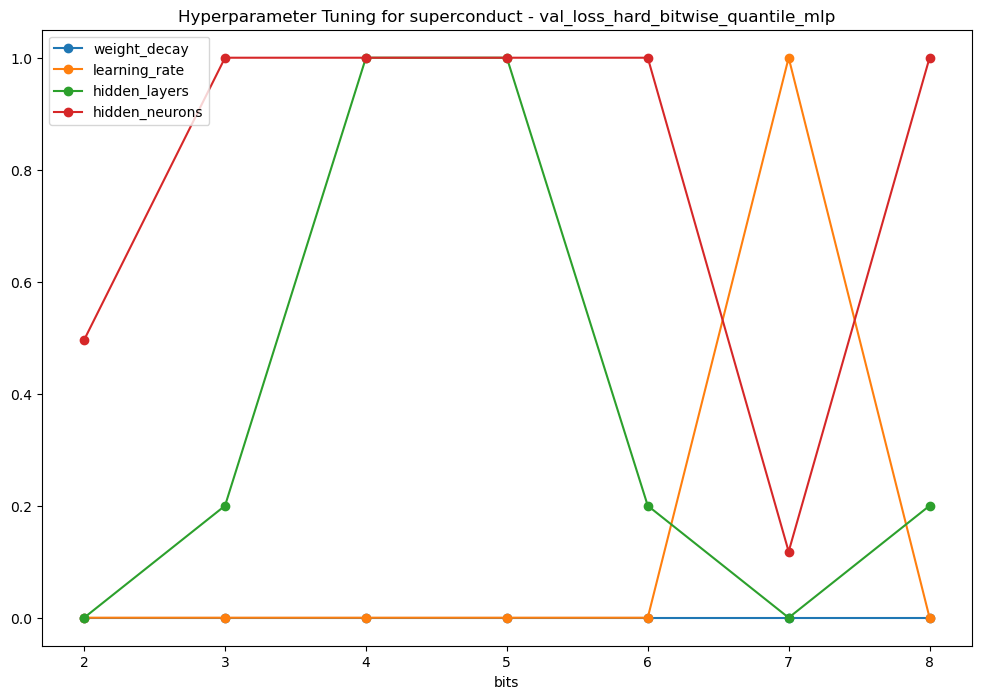

In [81]:
for los_col in loss_columns:
    # loss_col = 'val_loss_hard_thr_pre_mlp'
    df_hyp[df_hyp['optimal_loss'] == loss_col].plot(x='bits', y =hyperparameter_columns, kind='line', marker='o', figsize=(12, 8), title=f'Hyperparameter Tuning for {dataset} - {los_col}')
    plt.show()

In [61]:
dataset = 'superconduct'
df_all = pd.DataFrame()
for f in range(2,9):
    path_df = r'../results\{}_best_models__{}bits_20runs_ext.csv'.format(dataset, f)
    df_current = pd.read_csv(path_df)
    loss_columns = [col for col in df_current.columns if 'loss' in col]
    df_current = pd.DataFrame(df_current[loss_columns].quantile(0.25,axis=0)).T
    df_current.index = [f]
    df_all = pd.concat([df_all, df_current], axis=0)


In [50]:
path_df = r'../results\{}_best_models__{}bits_20runs_ext.csv'.format(dataset, 4)
df_current = pd.read_csv(path_df)

In [51]:
df_current

,val_loss_mlp,val_loss_hard_post_mlp,val_loss_hard_thr_post_mlp,val_loss_hard_pre_mlp,val_loss_hard_thr_pre_mlp,val_loss_soft_mlp,val_loss_soft_hard_mlp,val_loss_soft_comp_mlp,val_loss_soft_hard_comp_mlp,val_loss_hard_bitwise_minmax_mlp,val_loss_hard_bitwise_quantile_mlp
0,0.128750,8.447163,0.105342,0.120808,0.104385,0.090740,0.091216,0.079876,0.080318,0.102819,0.094088
1,0.097092,1.191217,0.105751,0.120819,0.106099,0.095218,0.095385,0.088638,0.089223,0.103758,0.096158
2,0.090546,7.982841,0.108194,0.127460,0.104192,0.091087,0.091156,0.083477,0.084575,0.106906,0.100594
3,0.089301,1.427619,0.102439,0.121655,0.100520,0.090329,0.090163,0.081314,0.082090,0.095675,0.095507
4,0.084364,1.674226,0.108514,0.118023,0.100840,0.089521,0.089698,0.080401,0.080990,0.104902,0.090907
5,0.087636,2.047682,0.104393,0.122459,0.109000,0.093308,0.093929,0.083910,0.084677,0.104952,0.092734
6,0.090919,14.573745,0.113532,0.122252,0.106136,0.091054,0.091212,0.085456,0.086437,0.106476,0.098598
7,0.087624,0.259409,0.105186,0.113102,0.098606,0.087189,0.087444,0.089130,0.089678,0.105156,0.096902
8,0.080422,10.745899,0.093632,0.117688,0.096850,0.085364,0.085833,0.076393,0.076869,0.100226,0.095102
9,0.087361,13.743449,0.103235,0.125175,0.101346,0.088731,0.088983,0.084485,0.085125,0.105747,0.097962


In [55]:
df_all.diff(axis=0)

,val_loss_mlp,val_loss_hard_post_mlp,val_loss_hard_thr_post_mlp,val_loss_hard_pre_mlp,val_loss_hard_thr_pre_mlp,val_loss_soft_mlp,val_loss_soft_hard_mlp,val_loss_soft_comp_mlp,val_loss_soft_hard_comp_mlp,val_loss_hard_bitwise_minmax_mlp,val_loss_hard_bitwise_quantile_mlp
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.062667,-3.624865,-2.087679,-2.185004,-2.003037,-1.578539,-1.587145,-1.708098,-1.710892,-2.209020,-2.093478
4,-0.021521,-0.707050,-0.536065,-0.627738,-0.524049,-0.579357,-0.585648,-0.451092,-0.459766,-0.593586,-0.562233
5,-0.041103,-0.089689,-0.156676,-0.155827,-0.125448,-0.070475,-0.075354,-0.151962,-0.157257,-0.139536,-0.135437
6,0.038471,-0.038358,0.023855,-0.018924,0.126573,-0.020650,-0.025436,-0.030801,-0.032306,-0.017009,0.036837
7,-0.042827,-0.064518,-0.057646,0.000646,-0.023605,-0.061374,-0.061364,-0.012309,-0.015178,-0.010984,-0.072410
8,0.065911,0.031774,0.026432,-0.017160,0.388855,0.079178,0.079176,0.018735,0.018735,-0.007786,0.010577


(100.0, 150.0)

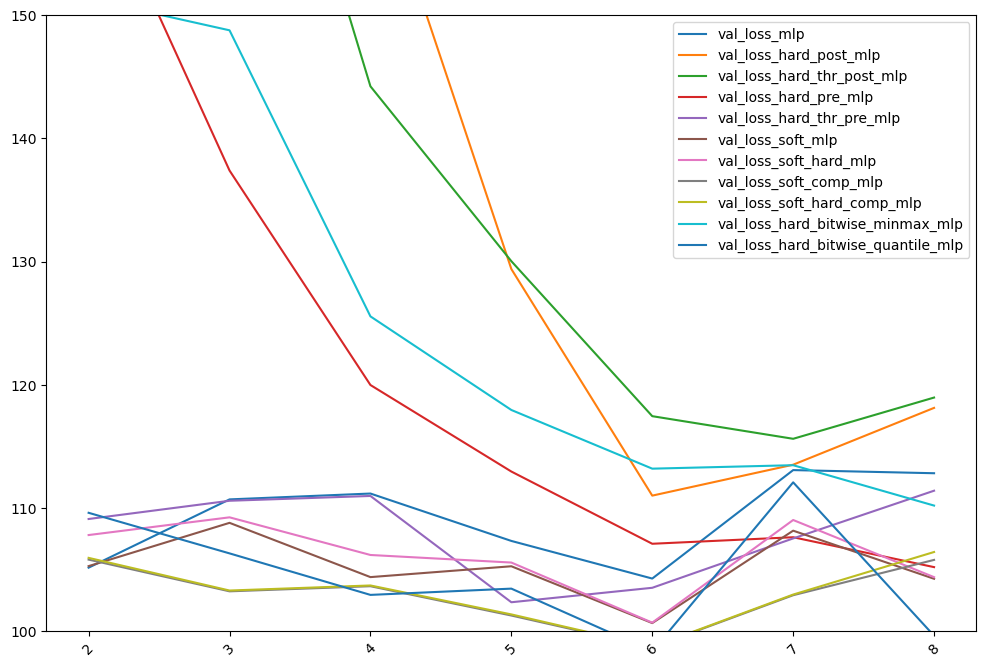

In [62]:
df_all.plot(figsize=(12, 8))
plt.xticks(rotation=45)
plt.ylim(100,150)